Understanding the Data

Before diving into the analysis, gaining a deep understanding of the data is essential. The dataset centers around predicting the likelihood of failure for a specific device, based on 12 distinct features. These features encompass various aspects relevant to the device's operation and condition, with one specifically indicating failure.
Project Objectives

    Predict Device Failures: The primary goal is to forecast device failures accurately, facilitating timely repairs to prevent damage.
    Comprehensive Data Analysis: Perform an exploratory data analysis (EDA) to understand the distributions, correlations, and patterns within the data.
    Feature Selection and Engineering: Identify and select the most relevant features that contribute significantly to the prediction of device failures. This may involve creating new features that better capture the predictive signals in the data.
    Model Development and Evaluation:
        Train models using various machine learning algorithms to assess their performance in predicting device failures.
        Evaluate each model's accuracy and other relevant metrics to determine their effectiveness.
    Selection of the Best Model: Compare the models based on their performance metrics, and select the best one for predicting device failures in the dataset.

Steps to Follow

    Data Loading and Initial Exploration: Load the dataset using pandas and conduct a preliminary examination to understand its structure, missing values, and basic statistics.
    Exploratory Data Analysis (EDA): Use seaborn and matplotlib for visualization to uncover patterns, trends, and outliers in the data. This step is crucial for gaining insights and informing the subsequent feature selection process.
    Feature Selection and Engineering: Apply techniques to select the most impactful features and, if necessary, engineer new features to improve model performance.
    Model Training: Experiment with various machine learning algorithms, such as logistic regression, decision trees, random forests, gradient boosting, and others suited to the problem.
    Model Evaluation: Assess each model's performance using appropriate metrics, such as accuracy, precision, recall, F1 score, and ROC-AUC, to gauge its predictive power.
    Model Selection: Choose the model that demonstrates the best balance of performance metrics, considering the particular importance of correctly predicting failures.
    Conclusion and Future Steps: Summarize the findings, discuss the selected model's implications, and suggest directions for future research or improvement.


Import the Useful libraries for read the data -pandas,for algrebraic calculations;- numpy ,for visualization;seaborn,matplotlib

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns    
# import pandas_pro filing
import matplotlib.pyplot as plt
%matplotlib inline 

Read the data

In [2]:
data=pd.read_csv("https://starlab-public.s3.amazonaws.com/work_sample/predictive_maintenance.csv")

show the data 

In [3]:
data

date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/15  S1F01085        0  215630672       56        0       52   
1        1/1/15  S1F0166B        0   61370680        0        3        0   
2        1/1/15  S1F01E6Y        0  173295968        0        0        0   
3        1/1/15  S1F01JE0        0   79694024        0        0        0   
4        1/1/15  S1F01R2B        0  135970480        0        0        0   
...         ...       ...      ...        ...      ...      ...      ...   
124489  11/2/15  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/15  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/15  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/15  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/15  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
0             6   407438        0        0        7  
1             6   403174        0        0        0  
2            12   237394        0        0        0  
3             6   410186        0        0        0  
4            15   313173        0        0        3  
...         ...      ...      ...      ...      ...  
124489       10   353705        8        8        0  
124490       11   332792        0        0       13  
124491       11   350410        0        0        0  
124492       12   358980        0        0        0  
124493       10   351431        0        0        0  

[124494 rows x 12 columns]

EDA(Exploratory Data Analysis)

Get the Information about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


date,device is String and failure,metric0to9 is integer 

data size is >11.4 MB

Get the datatype of features 

In [5]:
data.dtypes

date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

Observation: failure,mtric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9 is numerical fetaures  and date,device is categorical features we will have to convert the categorical into the numerical features so that our model will learn the features 

<Axes: >

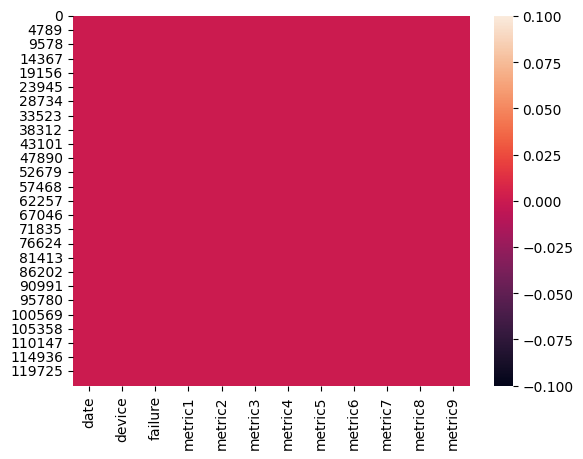

In [6]:
sns.heatmap(data.isnull())

Observation:data is not null value means Empty Value
Now Get the statics of data 

In [7]:
data.describe().T

count          mean           std  min         25%          50%  \
failure  124494.0  8.514467e-04  2.916725e-02  0.0         0.0          0.0   
metric1  124494.0  1.223881e+08  7.045933e+07  0.0  61284762.0  122797388.0   
metric2  124494.0  1.594848e+02  2.179658e+03  0.0         0.0          0.0   
metric3  124494.0  9.940455e+00  1.857473e+02  0.0         0.0          0.0   
metric4  124494.0  1.741120e+00  2.290851e+01  0.0         0.0          0.0   
metric5  124494.0  1.422267e+01  1.594303e+01  1.0         8.0         10.0   
metric6  124494.0  2.601727e+05  9.915108e+04  8.0    221452.0     249799.5   
metric7  124494.0  2.925282e-01  7.436924e+00  0.0         0.0          0.0   
metric8  124494.0  2.925282e-01  7.436924e+00  0.0         0.0          0.0   
metric9  124494.0  1.245152e+01  1.914256e+02  0.0         0.0          0.0   

                 75%          max  
failure          0.0          1.0  
metric1  183309640.0  244140480.0  
metric2          0.0      64968.0  
metric3          0.0      24929.0  
metric4          0.0       1666.0  
metric5         12.0         98.0  
metric6     310266.0     689161.0  
metric7          0.0        832.0  
metric8          0.0        832.0  
metric9          0.0      18701.0

Observation:metric 1,metric5,metric6 change their values with respect to mean and failure,metric 2,metric4,metric7,metric8,metric9 does not change their value compare with those features

In [8]:
data.duplicated().sum()

1

Observation:data has 1 duplicate value so i have to delete it 

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

Observation:I have delete the duplicated value 

In [11]:
data.shape

(124493, 12)

Observation:Data has 124493 samples and 12 features like date,failure,metric1to9.

In [12]:
data['date'].value_counts()

date
1/1/15      1163
1/2/15      1163
1/3/15      1163
1/4/15      1162
1/5/15      1161
            ... 
10/27/15      31
10/29/15      31
10/30/15      31
10/31/15      31
11/2/15       31
Name: count, Length: 304, dtype: int64

Observation:I count the number of values in the date feature .

In [13]:
data['device'].value_counts()

device
Z1F0QLC1     304
S1F0KYCR     304
S1F0E9EP     304
S1F0EGMT     304
S1F0FGBQ     304
            ... 
W1F1CHZK       5
W1F1CJKT       5
S1F04KSC       4
W1F0WJFT       3
W1F1DA5Ã¿      1
Name: count, Length: 1169, dtype: int64

Observation:I observe that there are 124493 samples so inerpeter not show the whole value 

In [14]:
data['failure'].value_counts()

failure
0    124387
1       106
Name: count, dtype: int64

Observation:Data is completely Imbalance . There are non failure device is 124387 and failure is 106.so I can do the oversampling techniques like SMOTE(Synthetic minority oversampling technique) .

In [15]:
data['metric1'].value_counts()

metric1
57192360     26
89196552     26
165048912    26
169490248    23
89162648     15
             ..
181770800     1
201893264     1
238768304     1
53326688      1
17572840      1
Name: count, Length: 123877, dtype: int64

Observation:Similarily I also find the number of unique value in metric 1 feature .

In [16]:
data['metric2'].value_counts()

metric2
0        118109
2344        281
8           260
24          254
40          201
          ...  
9984          1
3352          1
10024         1
6800          1
7944          1
Name: count, Length: 558, dtype: int64

Observation:Similarily I also find the number of unique value in metric 2 feature.

In [17]:
data['metric3'].value_counts()

metric3
0        115358
1          3274
2           749
7           298
34          293
5           278
21          269
4           268
9           262
8           251
61          245
100         245
10          241
1331        240
220         240
107         228
15          225
62          224
2693        179
318         177
70          118
3           113
18          106
56           96
12           90
72           84
263          84
406          84
35           70
11           14
208          13
14           12
25            6
2112          6
323           6
266           6
377           6
16            5
382           5
36            5
53            5
1326          5
24929         4
279           3
24            1
38            1
1162          1
Name: count, dtype: int64

In [18]:
data['metric4'].value_counts()

metric4
0      115155
6        3681
1         889
2         711
3         466
        ...  
204         1
118         1
36          1
147         1
164         1
Name: count, Length: 115, dtype: int64

In [19]:
data['metric5'].value_counts()

metric5
8     22144
9     13597
11    12792
10    11480
7     11271
12     9843
6      8542
13     6006
14     3517
5      3429
16     3140
15     1337
17     1052
4       933
19      901
3       815
58      771
24      720
63      672
95      672
60      672
37      635
36      562
23      557
32      476
68      448
92      448
57      448
20      421
90      357
33      306
25      305
38      291
39      252
64      252
18      251
35      230
31      230
61      224
66      224
94      224
89      224
78      224
59      224
98      224
70      224
62      224
67      224
91      215
34      213
21      211
2       203
1       173
40      151
65      117
42       94
30       45
22       30
29       18
41        8
Name: count, dtype: int64

In [20]:
data['metric6'].value_counts()

metric6
31        777
44        708
27        636
26        520
29        441
         ... 
333227      1
210463      1
218313      1
251108      1
351431      1
Name: count, Length: 44838, dtype: int64

In [21]:
data['metric7'].value_counts()

metric7
0      123035
8         793
16        397
24         65
48         36
32         35
128        23
40         20
176        20
6          13
72         11
96          7
56          6
312         5
736         4
80          4
104         3
152         2
832         2
272         2
112         2
22          2
744         1
216         1
496         1
240         1
136         1
424         1
Name: count, dtype: int64

In [22]:
data['metric8'].value_counts()

metric8
0      123035
8         793
16        397
24         65
48         36
32         35
128        23
40         20
176        20
6          13
72         11
96          7
56          6
312         5
736         4
80          4
104         3
152         2
832         2
272         2
112         2
22          2
744         1
216         1
496         1
240         1
136         1
424         1
Name: count, dtype: int64

In [23]:
data['metric9'].value_counts()

metric9
0        97357
1         9436
2         3722
3         2327
4         1396
         ...  
1864         5
10137        4
30           3
38           3
2269         1
Name: count, Length: 65, dtype: int64

In [24]:
data.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

Observation:There are 12 columns means features .

In [25]:
data['date'].unique()

array(['1/1/15', '1/2/15', '1/3/15', '1/4/15', '1/5/15', '1/6/15',
       '1/7/15', '1/8/15', '1/9/15', '1/10/15', '1/11/15', '1/12/15',
       '1/13/15', '1/14/15', '1/15/15', '1/16/15', '1/17/15', '1/18/15',
       '1/19/15', '1/20/15', '1/21/15', '1/22/15', '1/23/15', '1/24/15',
       '1/25/15', '1/26/15', '1/27/15', '1/28/15', '1/29/15', '1/30/15',
       '1/31/15', '2/1/15', '2/2/15', '2/3/15', '2/4/15', '2/5/15',
       '2/6/15', '2/7/15', '2/8/15', '2/9/15', '2/10/15', '2/11/15',
       '2/12/15', '2/13/15', '2/14/15', '2/15/15', '2/16/15', '2/17/15',
       '2/18/15', '2/19/15', '2/20/15', '2/21/15', '2/22/15', '2/23/15',
       '2/24/15', '2/25/15', '2/26/15', '2/27/15', '2/28/15', '3/1/15',
       '3/2/15', '3/3/15', '3/4/15', '3/5/15', '3/6/15', '3/7/15',
       '3/8/15', '3/9/15', '3/10/15', '3/11/15', '3/12/15', '3/13/15',
       '3/14/15', '3/15/15', '3/16/15', '3/17/15', '3/18/15', '3/19/15',
       '3/20/15', '3/21/15', '3/22/15', '3/23/15', '3/24/15', '3/25/15',
     

Observation:I find the unique value of dates , this data is all about 2015

In [26]:
data['date'].nunique()

304

In [27]:
data['device'].unique()

array(['S1F01085', 'S1F0166B', 'S1F01E6Y', ..., 'S1F02XLX', 'S1F03499',
       'W1F1DA5Ã¿'], dtype=object)

In [28]:
data['device'].nunique()

1169

In [29]:
data['failure'].unique()

array([0, 1], dtype=int64)

In [30]:
data['failure'].nunique()

2

In [31]:
for i in range(1,10):
     # print("Uniue value in metrics is :")
     # print(data[f'metric{i}'].sort_values().unique)
     print(f"\n Number of Unique value in metric{i} is :")
     print(data[f'metric{i}'].nunique())
     print('='*40)


 Number of Unique value in metric1 is :
123877

 Number of Unique value in metric2 is :
558

 Number of Unique value in metric3 is :
47

 Number of Unique value in metric4 is :
115

 Number of Unique value in metric5 is :
60

 Number of Unique value in metric6 is :
44838

 Number of Unique value in metric7 is :
28

 Number of Unique value in metric8 is :
28

 Number of Unique value in metric9 is :
65


Observation:Here I iterate the nunique function over the metrics features.

In [32]:
data['metric1'].sort_values().head(400).unique()

array([     0,   2048,   2056,   2168,   3784,   4224,   4480,   4560,
         8280,   8616,   9088,   9472,  11480,  12776,  13824,  15928,
        17272,  18800,  19120,  23840,  26624,  28568,  30088,  35544,
        37680,  40208,  41000,  43016,  43888,  45088,  45216,  47288,
        47472,  47528,  48128,  48152,  48384,  49272,  49792,  50128,
        50584,  50696,  52664,  53184,  54040,  60192,  61208,  72808,
        75736,  76200,  78120,  79240,  89968,  90528,  95216,  96024,
        96264,  96272,  96968,  97848,  98736, 100920, 101640, 112376,
       112760, 123608, 124768, 125456, 127088, 127384, 132096, 132832,
       134568, 142720, 144368, 151600, 152520, 155968, 156120, 157792,
       163912, 167408, 172112, 172696, 172984, 176912, 177520, 178568,
       183192, 183760, 188416, 192576, 194072, 196064, 198760, 199312,
       199672, 200144, 202056, 207720, 210008, 210576, 214624, 215104,
       219280, 221560, 226024, 226184, 227536, 228208, 228936, 231424,
      

Observation:This is for the date sort unique values .

In [33]:
# data['metric2'].sort_values().head(10000).unique()

convert the date into the pandas dataframe date so that i will able to find the day,month,year easily and convert there datatype which is categorical to numerical means int dtype

In [34]:
data['date']=pd.to_datetime(data['date'])
# data['date'].describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_22344\2161225082.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date']=pd.to_datetime(data['date'])


In [35]:
data['date'].describe()

count                           124493
mean     2015-04-16 05:19:50.900692992
min                2015-01-01 00:00:00
25%                2015-02-09 00:00:00
50%                2015-03-27 00:00:00
75%                2015-06-17 00:00:00
max                2015-11-02 00:00:00
Name: date, dtype: object

Observation:data contain the failure device from 1/1/2015 to 2/11/2015 means approx 11 months .In last data is for 11 months .

checking the outlier by boxplot. we can find the outlier by calculating 5 number summary -min,Q1,median,Q3,max and calculate the IQR range and after that find the lower fence and higher fence which help in find the outlier 

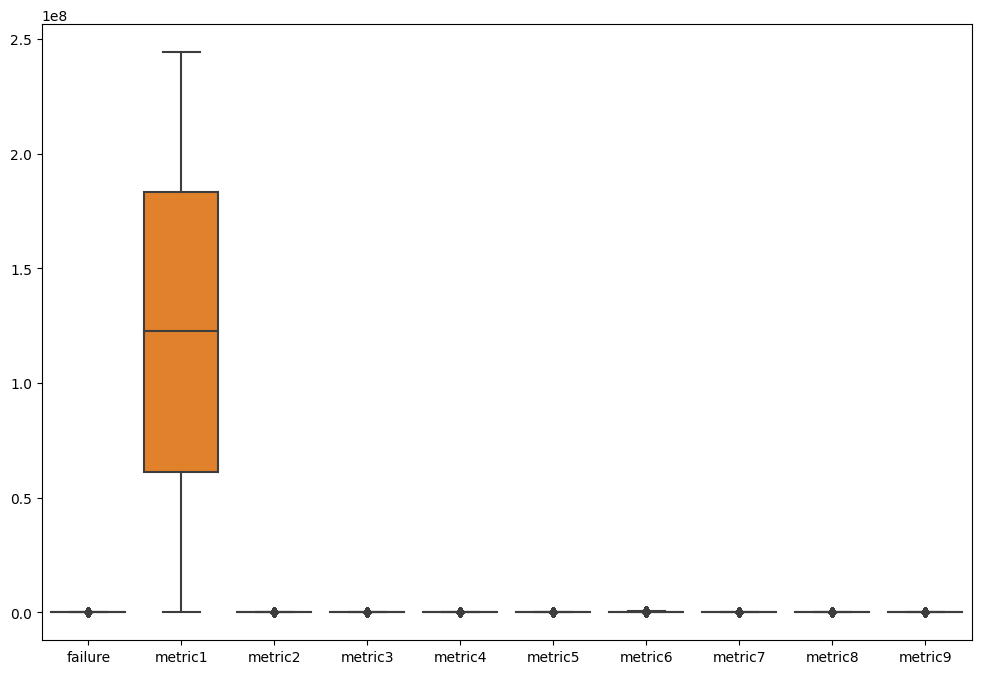

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(data)
plt.show()

Observation: there is not outlier in the data .Outlier can give some information Regarding the data 

In [37]:
df=data.copy()

In [38]:
df.head(50)

date    device  failure    metric1  metric2  metric3  metric4  \
0  2015-01-01  S1F01085        0  215630672       56        0       52   
1  2015-01-01  S1F0166B        0   61370680        0        3        0   
2  2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3  2015-01-01  S1F01JE0        0   79694024        0        0        0   
4  2015-01-01  S1F01R2B        0  135970480        0        0        0   
5  2015-01-01  S1F01TD5        0   68837488        0        0       41   
6  2015-01-01  S1F01XDJ        0  227721632        0        0        0   
7  2015-01-01  S1F023H2        0  141503600        0        0        1   
8  2015-01-01  S1F02A0J        0    8217840        0        1        0   
9  2015-01-01  S1F02DZ2        0  116440096        0      323        9   
10 2015-01-01  S1F02EVN        0  112348104        0        0        0   
11 2015-01-01  S1F02L38        0  223938928        0        0        0   
12 2015-01-01  S1F02MGA        0   44399688        0      266        1   
13 2015-01-01  S1F02P76        0  104131304     1536        0      175   
14 2015-01-01  S1F02VAX        0   61019512      168        2      521   
15 2015-01-01  S1F02WFT        0   44348552     5160       14     1074   
16 2015-01-01  S1F0318A        0   35018688        0        0        0   
17 2015-01-01  S1F0322R        0   34540712        0        0        0   
18 2015-01-01  S1F0330P        0  125539768        0        0       12   
19 2015-01-01  S1F035SJ        0  220392160        0        0        0   
20 2015-01-01  S1F0377V        0  166567552        0        0       23   
21 2015-01-01  S1F039FE        0  218786520        0        0        6   
22 2015-01-01  S1F03RV3        0  176851840        0        0        0   
23 2015-01-01  S1F03YZM        0   55587136        0        0        0   
24 2015-01-01  S1F044ET        0  161730848        0        0        0   
25 2015-01-01  S1F049RX        0  181980928        0        0        4   
26 2015-01-01  S1F04DH8        0  134506192        0        9        0   
27 2015-01-01  S1F04KSC        0  105234552      392    24929      529   
28 2015-01-01  S1F04MVQ        0   41356960     1984        0       46   
29 2015-01-01  S1F04R7Y        0  126680112        0        0        0   
30 2015-01-01  S1F04TS4        0   11041528        0        0        8   
31 2015-01-01  S1F04Y6C        0  121664216        0        0        7   
32 2015-01-01  S1F059G0        0  131625384        0       14        0   
33 2015-01-01  S1F05AFP        0  182270456        0        0        2   
34 2015-01-01  S1F05B1Q        0  163784840        0        0        7   
35 2015-01-01  S1F05NAJ        0  133978568      192        0        0   
36 2015-01-01  S1F05P51        0  188415568      496        0        0   
37 2015-01-01  S1F05P5Z        0  212782472      928        0        3   
38 2015-01-01  S1F06E04        0   67826320     1952        0       12   
39 2015-01-01  S1F06F7K        0  124661944      128        0        0   
40 2015-01-01  S1F06R6W        0  107727520        0        0        0   
41 2015-01-01  S1F06ZX2        0  118304768        0        0        0   
42 2015-01-01  S1F08R94        0  193299520        0        1        0   
43 2015-01-01  S1F08S38        0   36835520      744        3        2   
44 2015-01-01  S1F09DZQ        0   12568128      136        0        2   
45 2015-01-01  S1F09MAK        0    9461552     7928        0        7   
46 2015-01-01  S1F09MSM        0  150282408      360        0        0   
47 2015-01-01  S1F0A1PX        0   32240224        0        0        0   
48 2015-01-01  S1F0A1VP        0  214406240        8        1        8   
49 2015-01-01  S1F0AADQ        0  204365424        0        0        0   

    metric5  metric6  metric7  metric8  metric9  
0         6   407438        0        0        7  
1         6   403174        0        0        0  
2        12   237394        0        0        0  
3         6   410186        0     

Copy the data into other variable.

Extract the Year columns from data to get the relation between the Year and failure

In [39]:
df['Year'] = df['date'].apply(lambda x: x.year)


In [40]:
df['Year']

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
124489    2015
124490    2015
124491    2015
124492    2015
124493    2015
Name: Year, Length: 124493, dtype: int64

Similarly extract the month from data to find the relation between the month and failure 

In [41]:
df['months']=df['date'].apply(lambda x:x.month)

In [42]:
df['months'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

Extract the day from date to get the relation between the day and failure

In [43]:
df['day']=df['date'].apply(lambda x:x.day)

In [44]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Relation between the day and months 

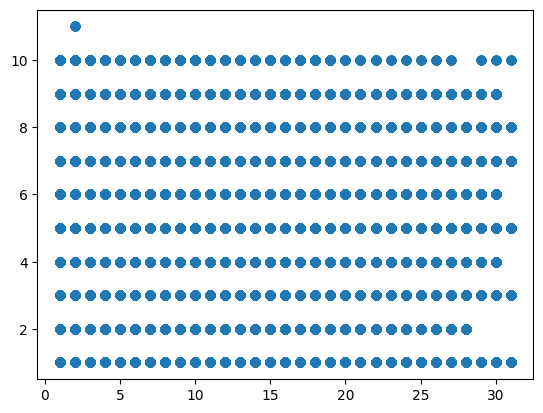

In [45]:
plt.scatter(x=df['day'],y=df['months'])
# plt.xticks('days',df.day)

Observation:In 11 month data contain only for 1 day i.e 2nd day and I want to see the in the feb means 2nd month data contain the information till 28th day .It means 1 to 10 months are important than 11th  month i.e November 

In [46]:
data=df.copy()

In [47]:
data

date    device  failure    metric1  metric2  metric3  metric4  \
0      2015-01-01  S1F01085        0  215630672       56        0       52   
1      2015-01-01  S1F0166B        0   61370680        0        3        0   
2      2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3      2015-01-01  S1F01JE0        0   79694024        0        0        0   
4      2015-01-01  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489 2015-11-02  Z1F0MA1S        0   18310224        0        0        0   
124490 2015-11-02  Z1F0Q8RT        0  172556680       96      107        4   
124491 2015-11-02  Z1F0QK05        0   19029120     4832        0        0   
124492 2015-11-02  Z1F0QL3N        0  226953408        0        0        0   
124493 2015-11-02  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  Year  months  day  
0             6   407438        0        0        7  2015       1    1  
1             6   403174        0        0        0  2015       1    1  
2            12   237394        0        0        0  2015       1    1  
3             6   410186        0        0        0  2015       1    1  
4            15   313173        0        0        3  2015       1    1  
...         ...      ...      ...      ...      ...   ...     ...  ...  
124489       10   353705        8        8        0  2015      11    2  
124490       11   332792        0        0       13  2015      11    2  
124491       11   350410        0        0        0  2015      11    2  
124492       12   358980        0        0        0  2015      11    2  
124493       10   351431        0        0        0  2015      11    2  

[124493 rows x 15 columns]

In [48]:
data.shape

(124493, 15)

get the categorical data into one variable and integer into another variable 

In [49]:
categorical_column=data.columns[data.dtypes=='object']

In [50]:
numerical_column=data.columns[data.dtypes!='object']

In [51]:
categorical_column

Index(['device'], dtype='object')

In [52]:
numerical_column

Index(['date', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'Year', 'months',
       'day'],
      dtype='object')

get the numerical data 

In [53]:
data[numerical_column]

date  failure    metric1  metric2  metric3  metric4  metric5  \
0      2015-01-01        0  215630672       56        0       52        6   
1      2015-01-01        0   61370680        0        3        0        6   
2      2015-01-01        0  173295968        0        0        0       12   
3      2015-01-01        0   79694024        0        0        0        6   
4      2015-01-01        0  135970480        0        0        0       15   
...           ...      ...        ...      ...      ...      ...      ...   
124489 2015-11-02        0   18310224        0        0        0       10   
124490 2015-11-02        0  172556680       96      107        4       11   
124491 2015-11-02        0   19029120     4832        0        0       11   
124492 2015-11-02        0  226953408        0        0        0       12   
124493 2015-11-02        0   17572840        0        0        0       10   

        metric6  metric7  metric8  metric9  Year  months  day  
0        407438        0        0        7  2015       1    1  
1        403174        0        0        0  2015       1    1  
2        237394        0        0        0  2015       1    1  
3        410186        0        0        0  2015       1    1  
4        313173        0        0        3  2015       1    1  
...         ...      ...      ...      ...   ...     ...  ...  
124489   353705        8        8        0  2015      11    2  
124490   332792        0        0       13  2015      11    2  
124491   350410        0        0        0  2015      11    2  
124492   358980        0        0        0  2015      11    2  
124493   351431        0        0        0  2015      11    2  

[124493 rows x 14 columns]

get the categorical data 

In [54]:
data[categorical_column]

device
0       S1F01085
1       S1F0166B
2       S1F01E6Y
3       S1F01JE0
4       S1F01R2B
...          ...
124489  Z1F0MA1S
124490  Z1F0Q8RT
124491  Z1F0QK05
124492  Z1F0QL3N
124493  Z1F0QLC1

[124493 rows x 1 columns]

count the unique value in a feature by the histplot 

Histplot between the Count and date :




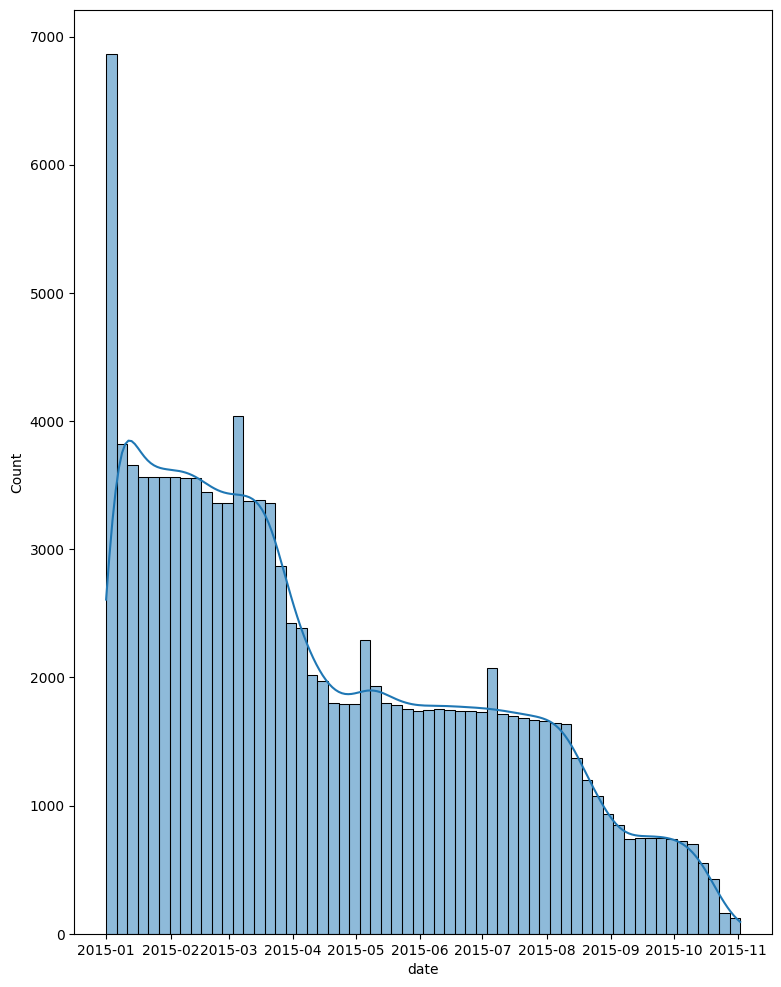

Histplot between the Count and failure :




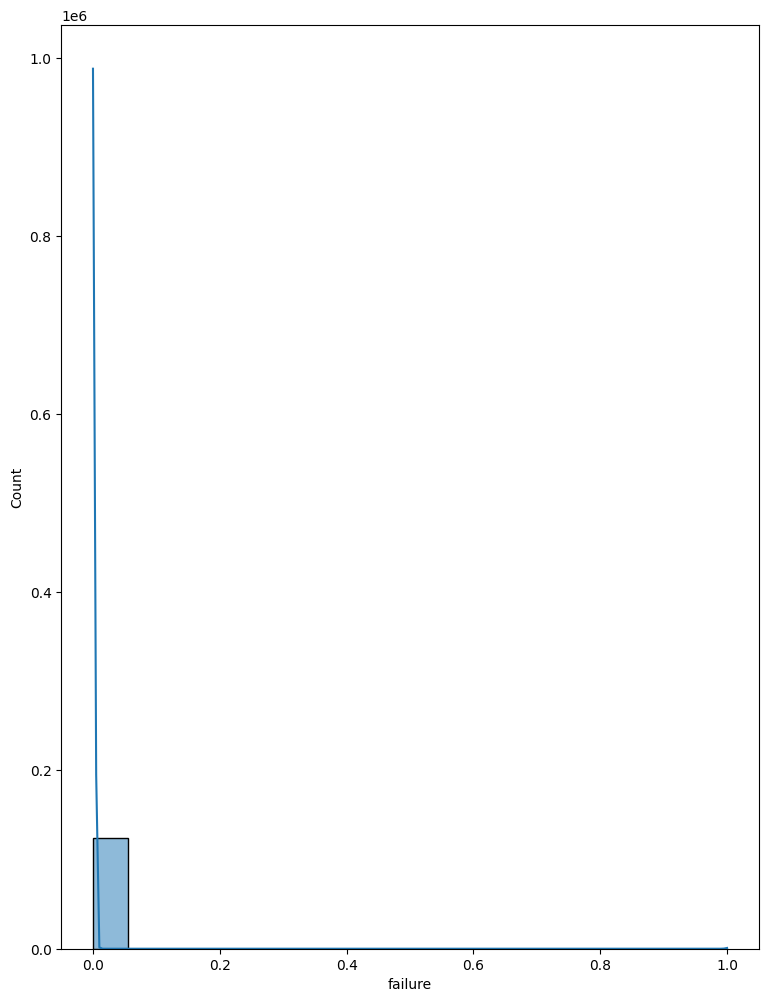

Histplot between the Count and metric1 :




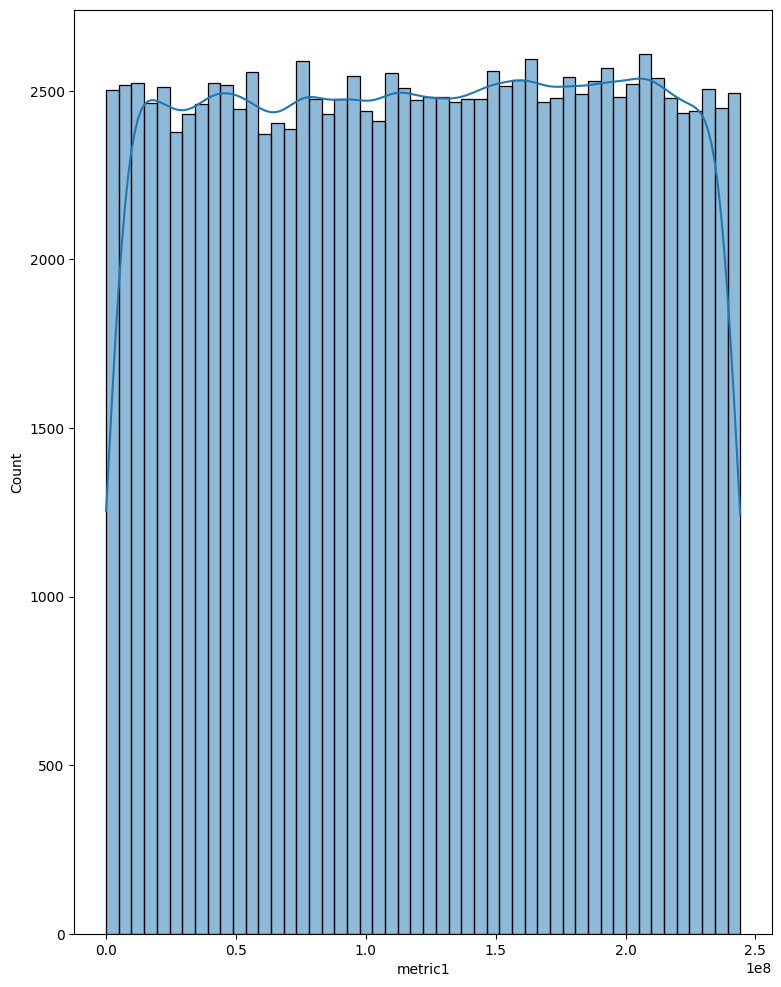

Histplot between the Count and metric2 :




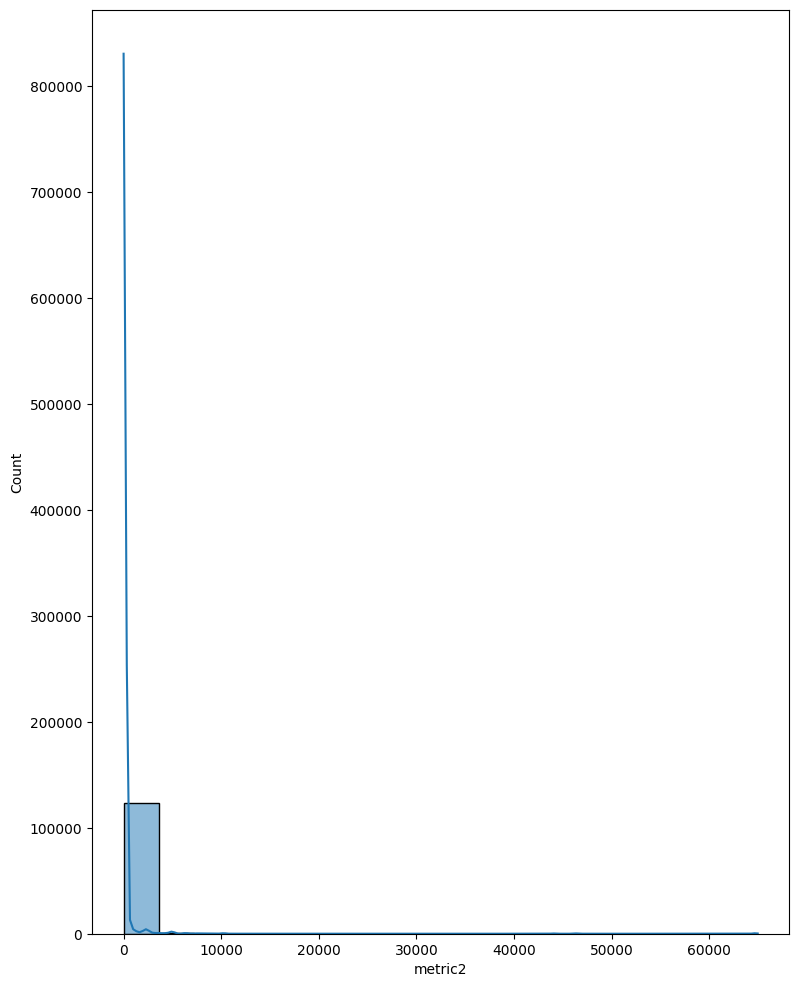

Histplot between the Count and metric3 :




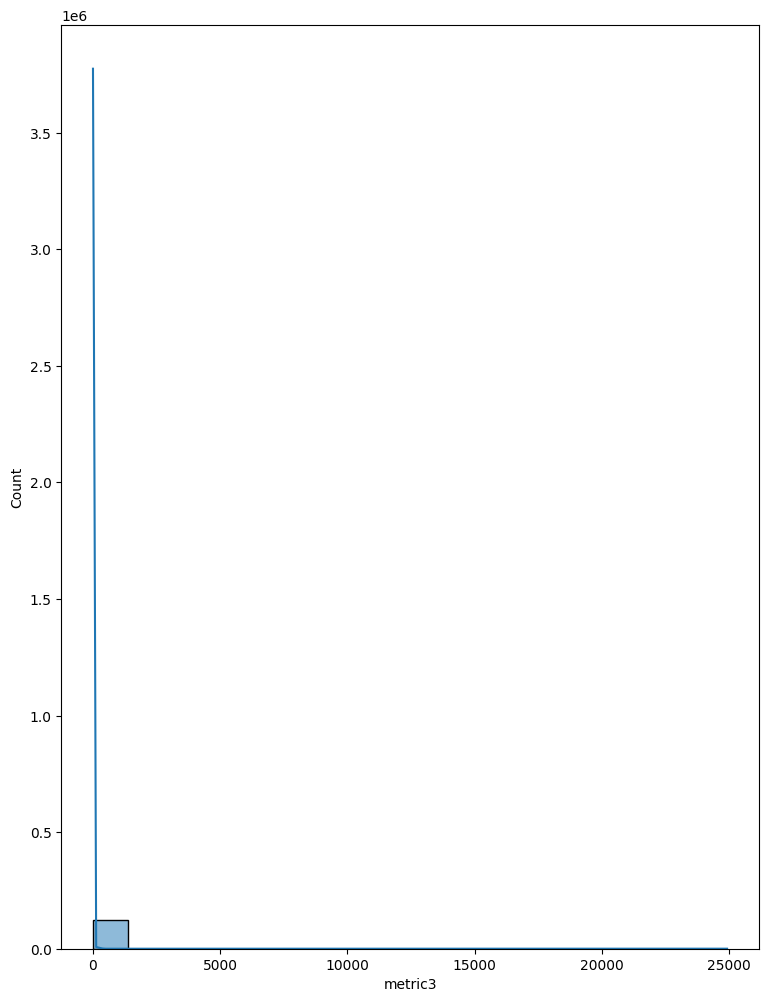

Histplot between the Count and metric4 :




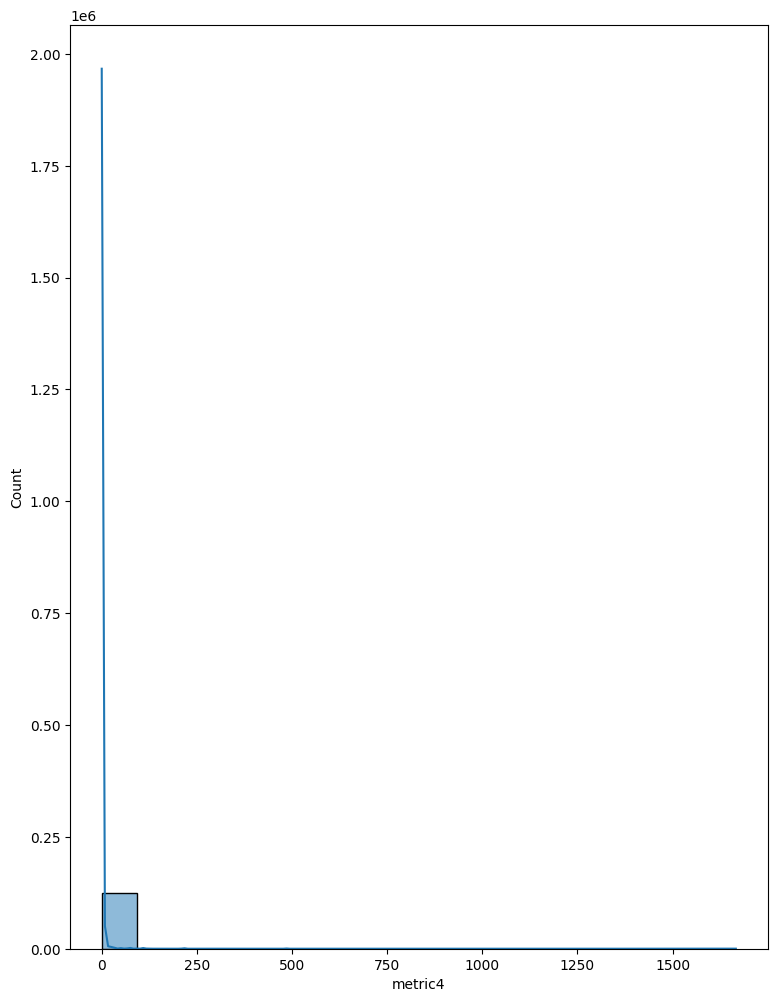

Histplot between the Count and metric5 :




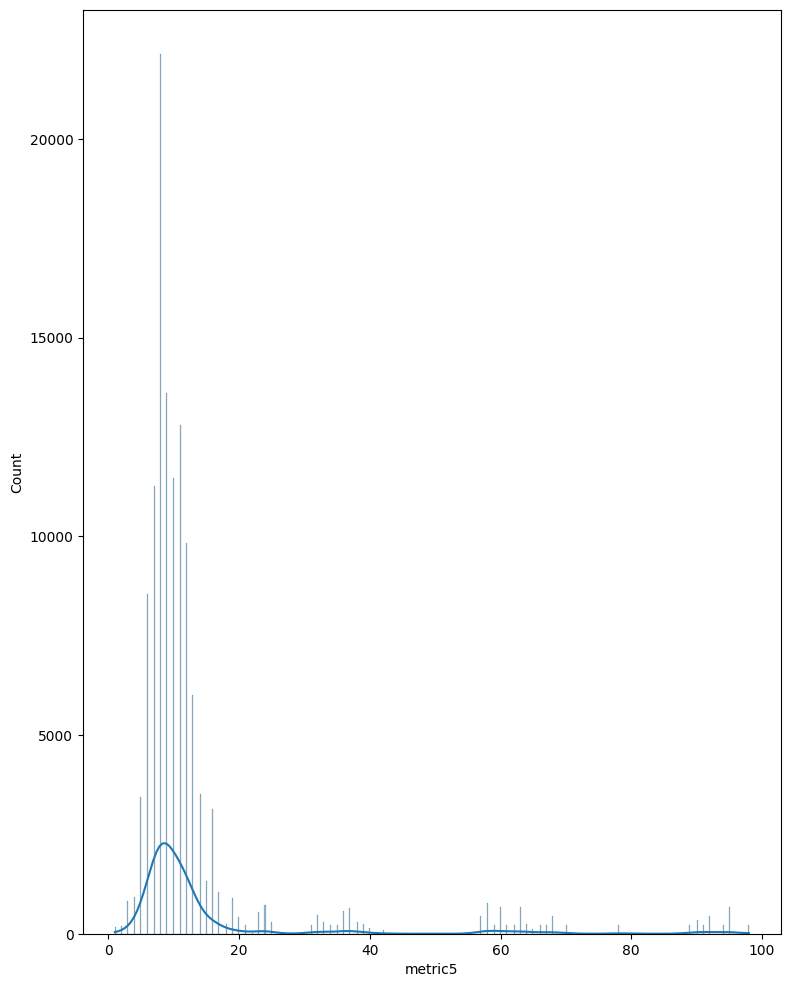

Histplot between the Count and metric6 :




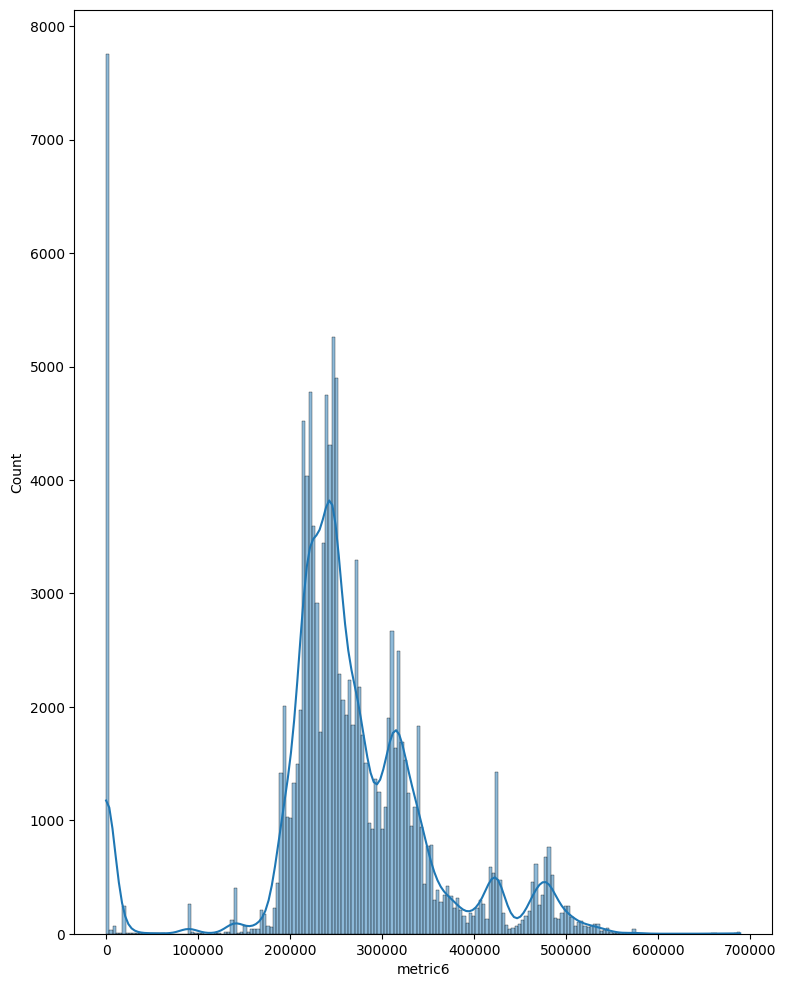

Histplot between the Count and metric7 :




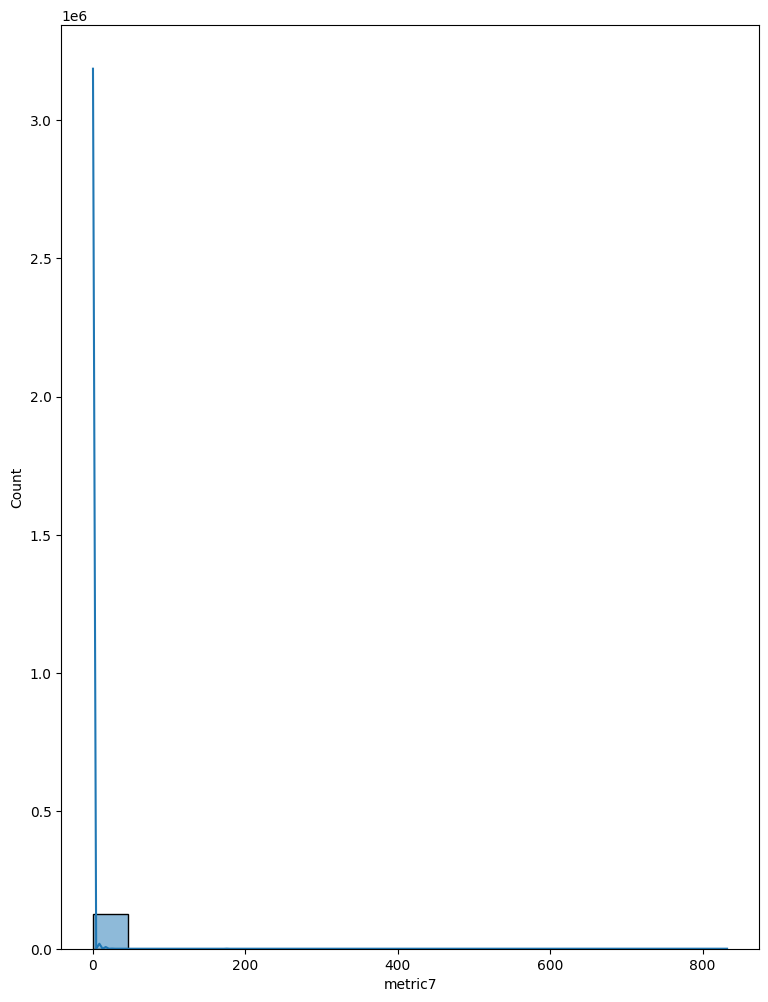

Histplot between the Count and metric8 :




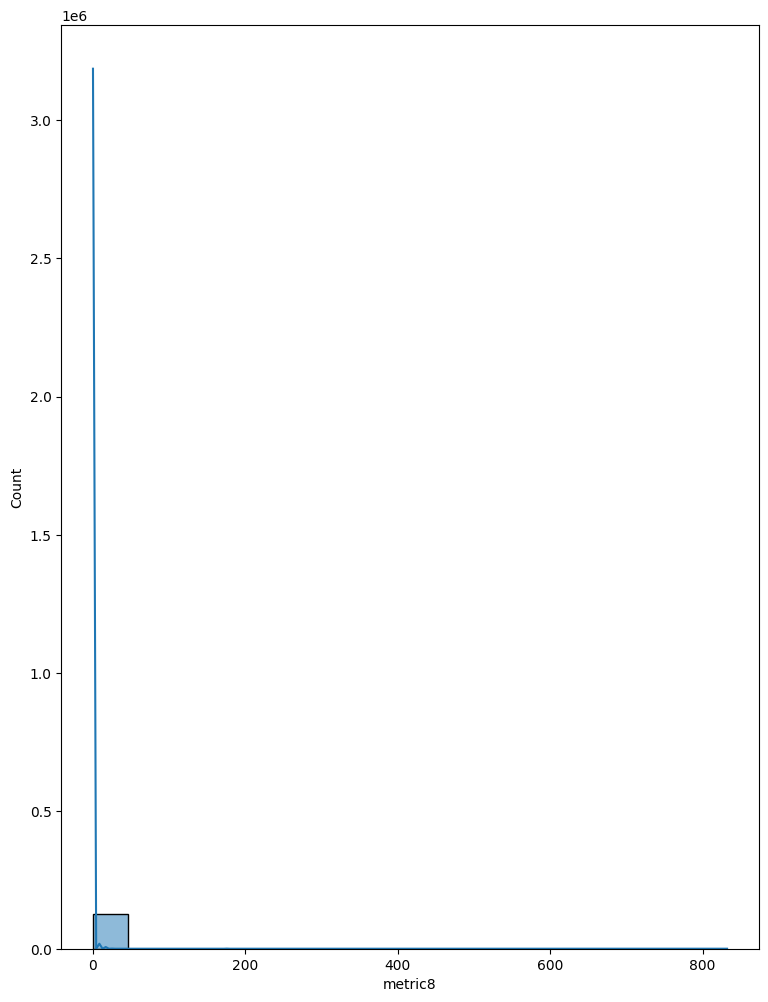

Histplot between the Count and metric9 :




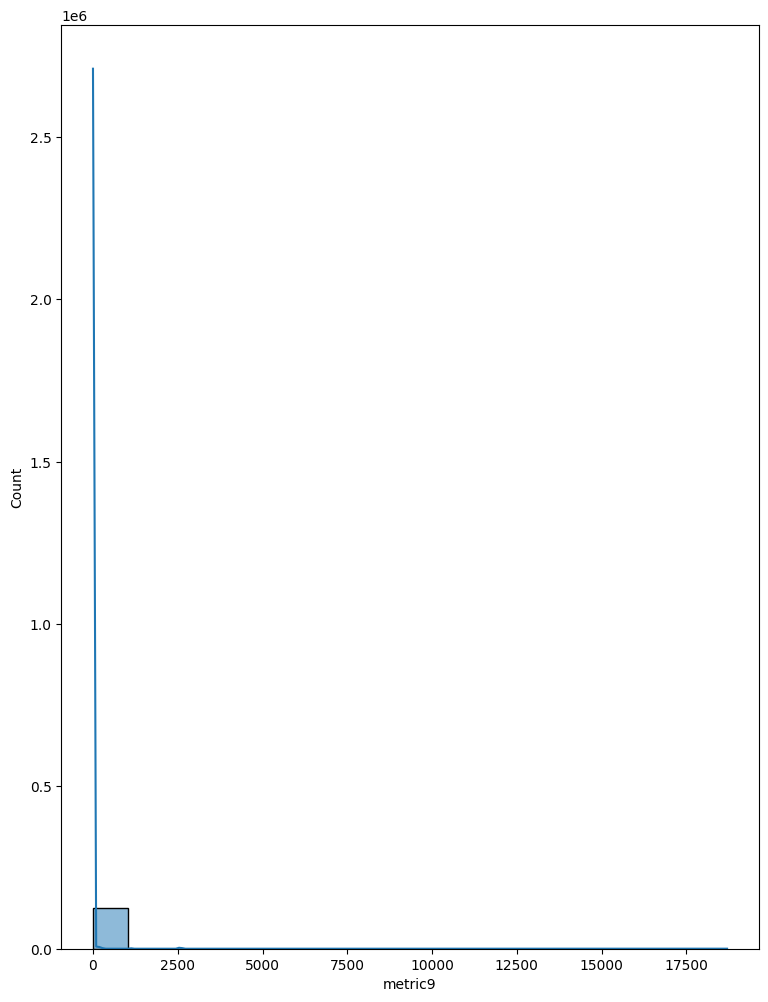

Histplot between the Count and Year :




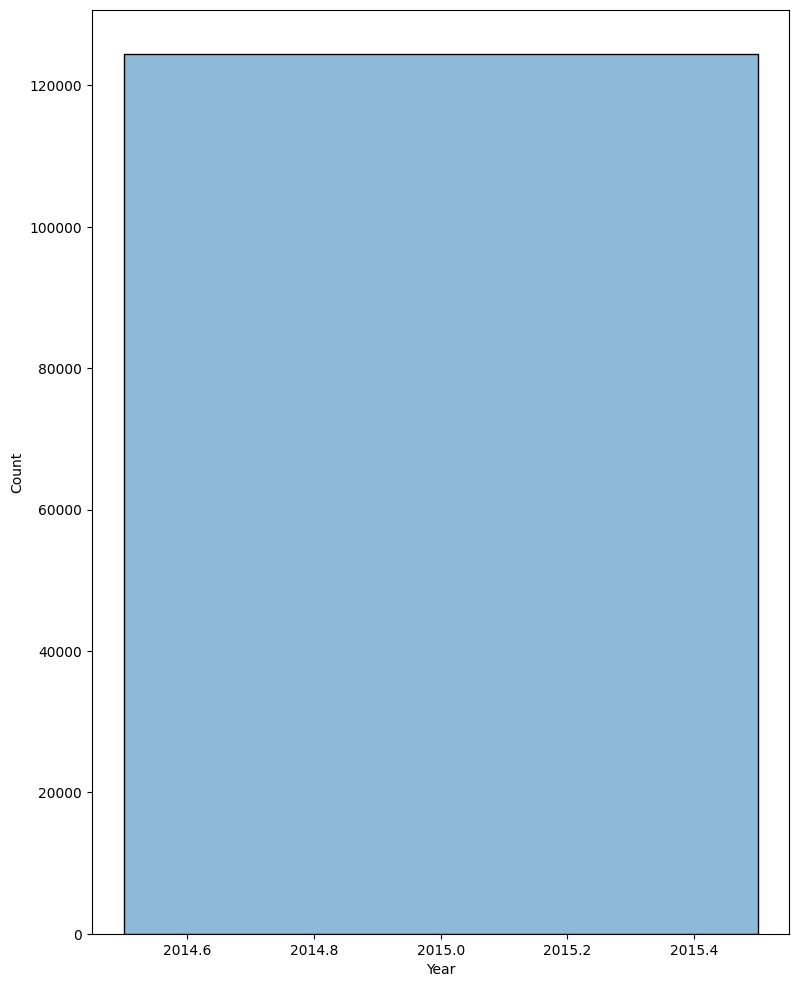

Histplot between the Count and months :




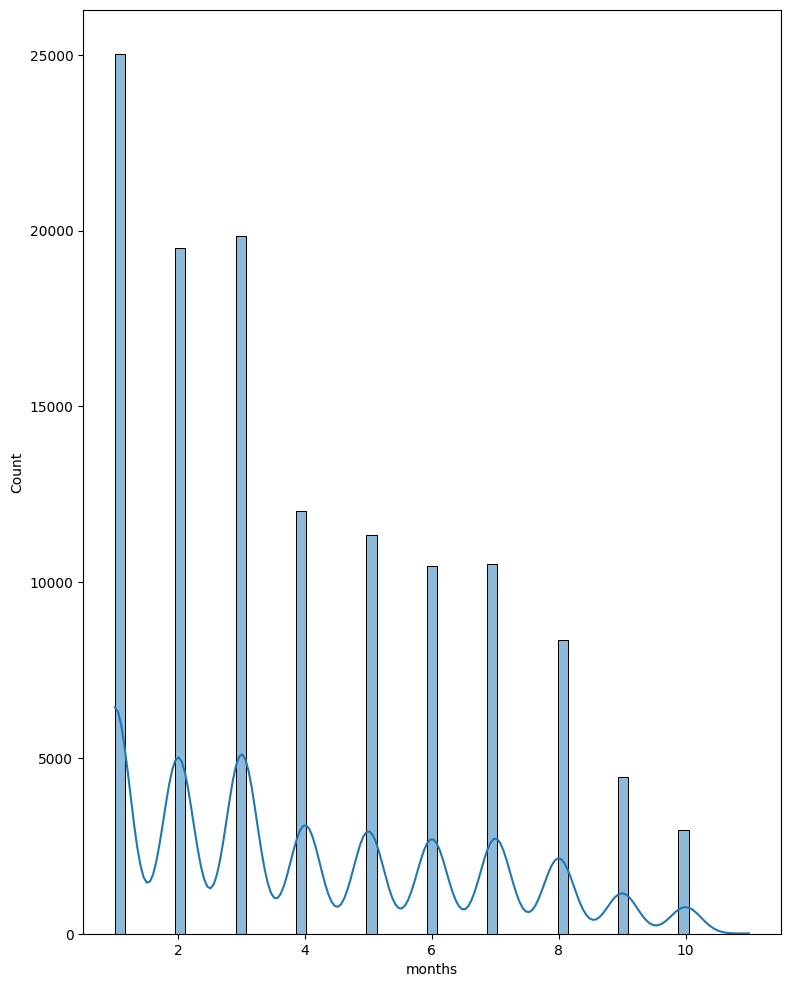

Histplot between the Count and day :




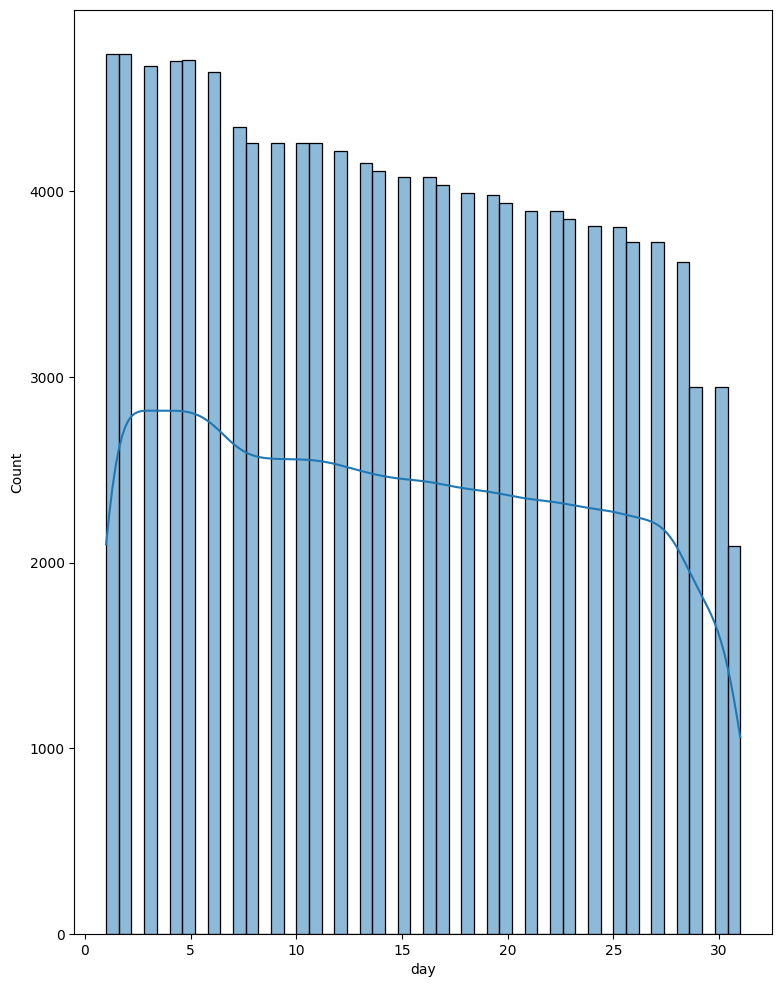

In [55]:

for col in numerical_column:
     print(f"Histplot between the Count and {col} :")
     plt.figure(figsize=(9,12))
     sns.histplot(data=data,x=col,kde=True)
     print("\n")
     print("="*40)
     plt.show()

visualization of features to determine the skewness of data distribution by hist plot 

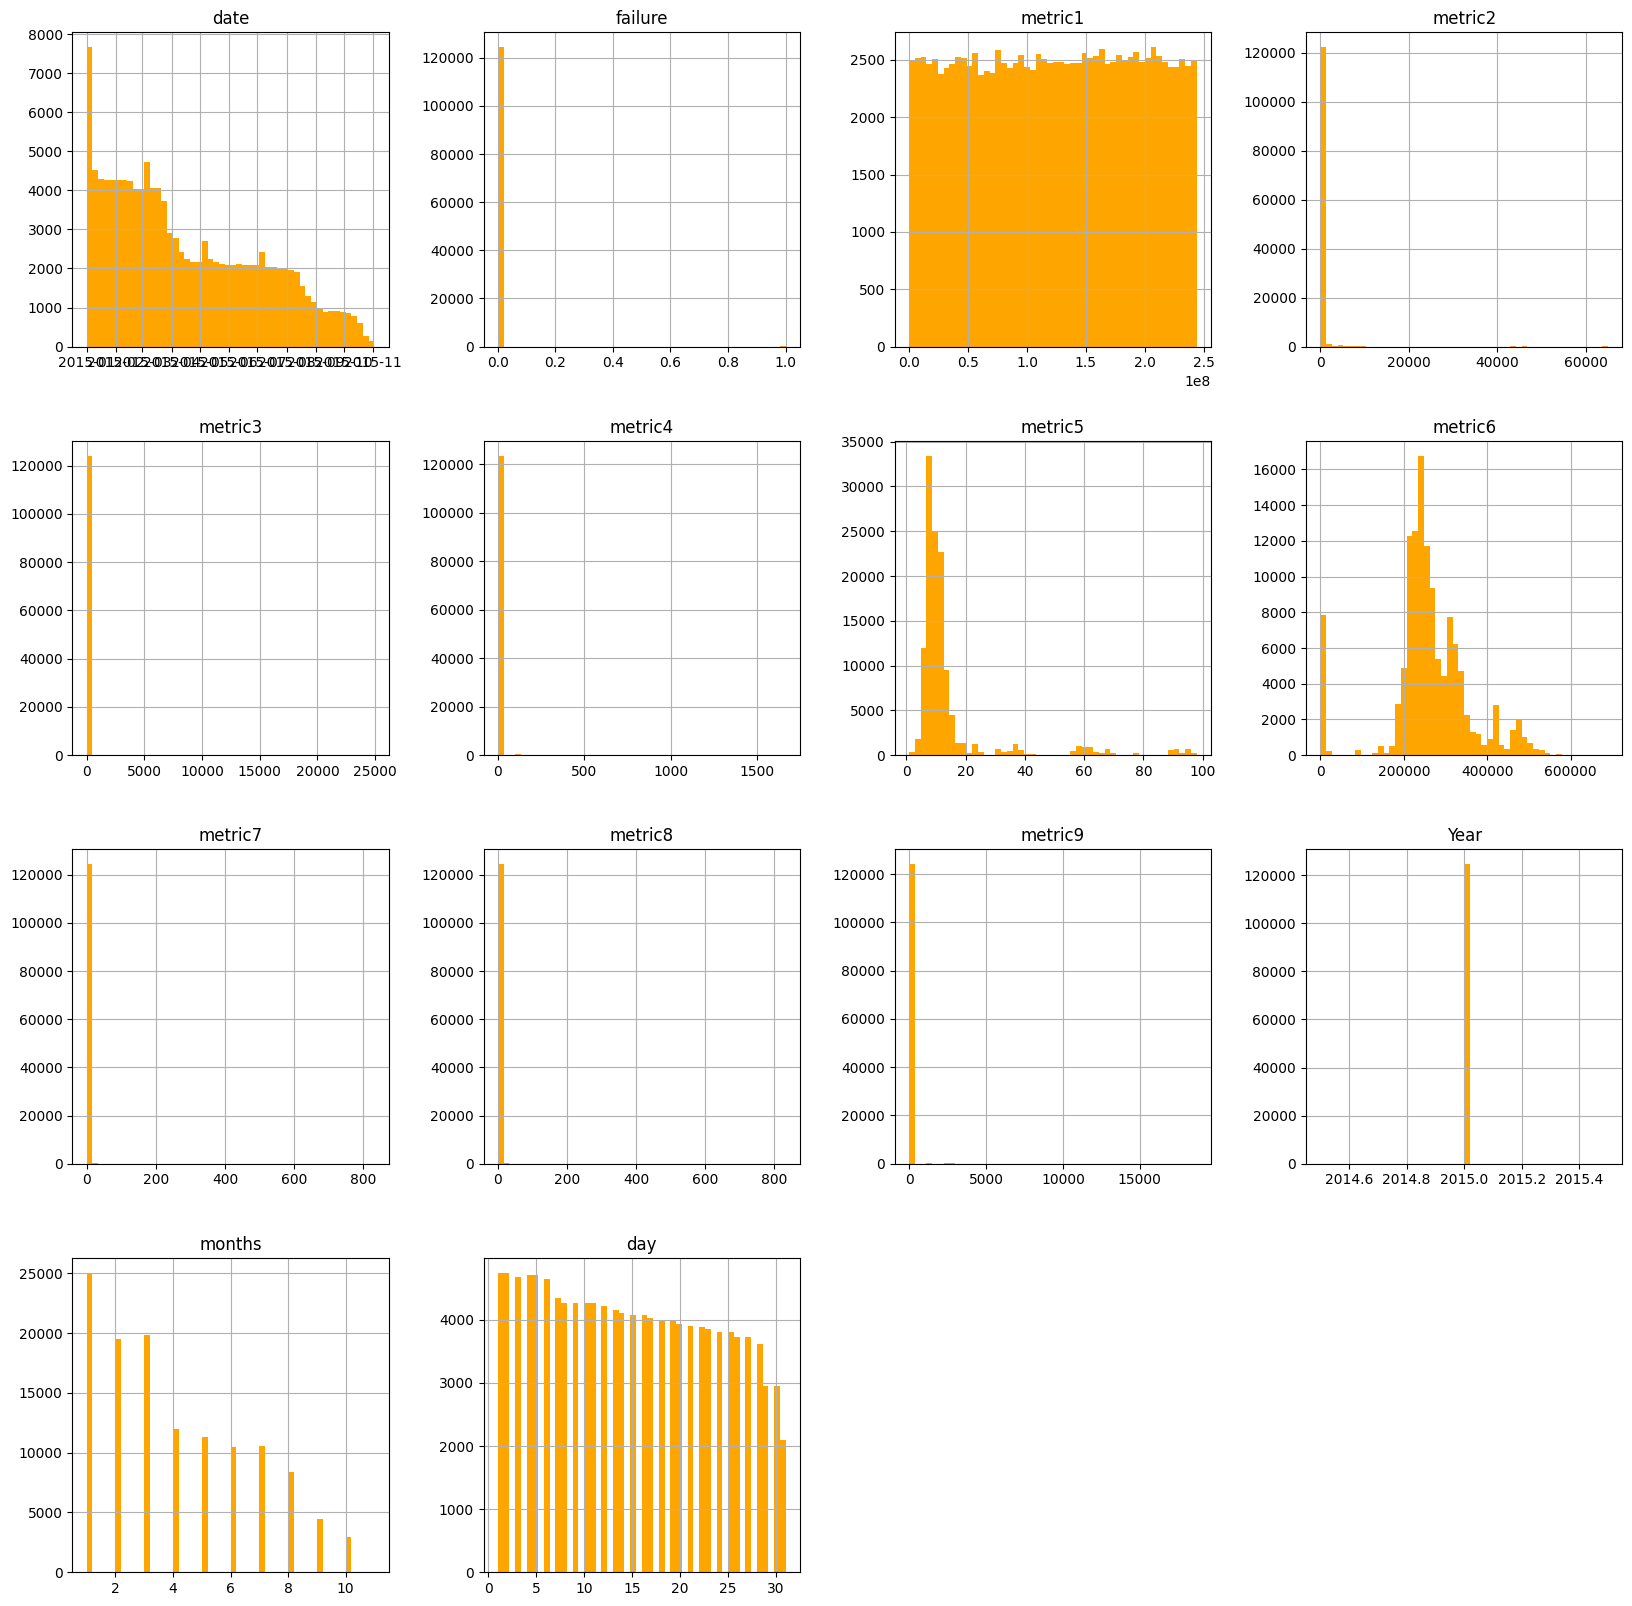

In [56]:
data.hist(bins=50,figsize=(20,20),color='orange')
plt.show()

Observation: most of the data is right skewness so we have convert into the normal distribution so that the model learn the pattern of data perfectly 

visualize the correlation between the features by heatmap 

<Axes: >

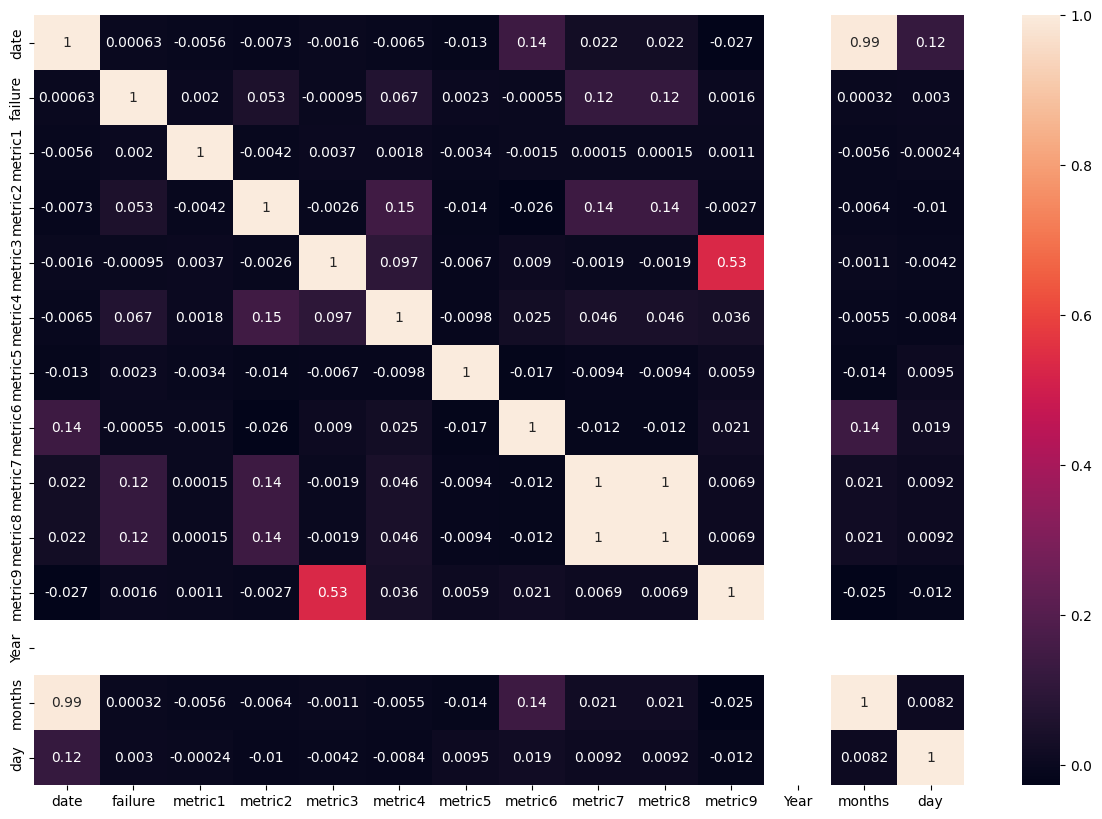

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(data[numerical_column].corr(),annot=True)

Observation :metric 7 and metric 8 and linear coorelated means if we change in the data of metric 7 it  will also changes in the metric 8 

visulaize all the data by pairplot to get the more information of data 

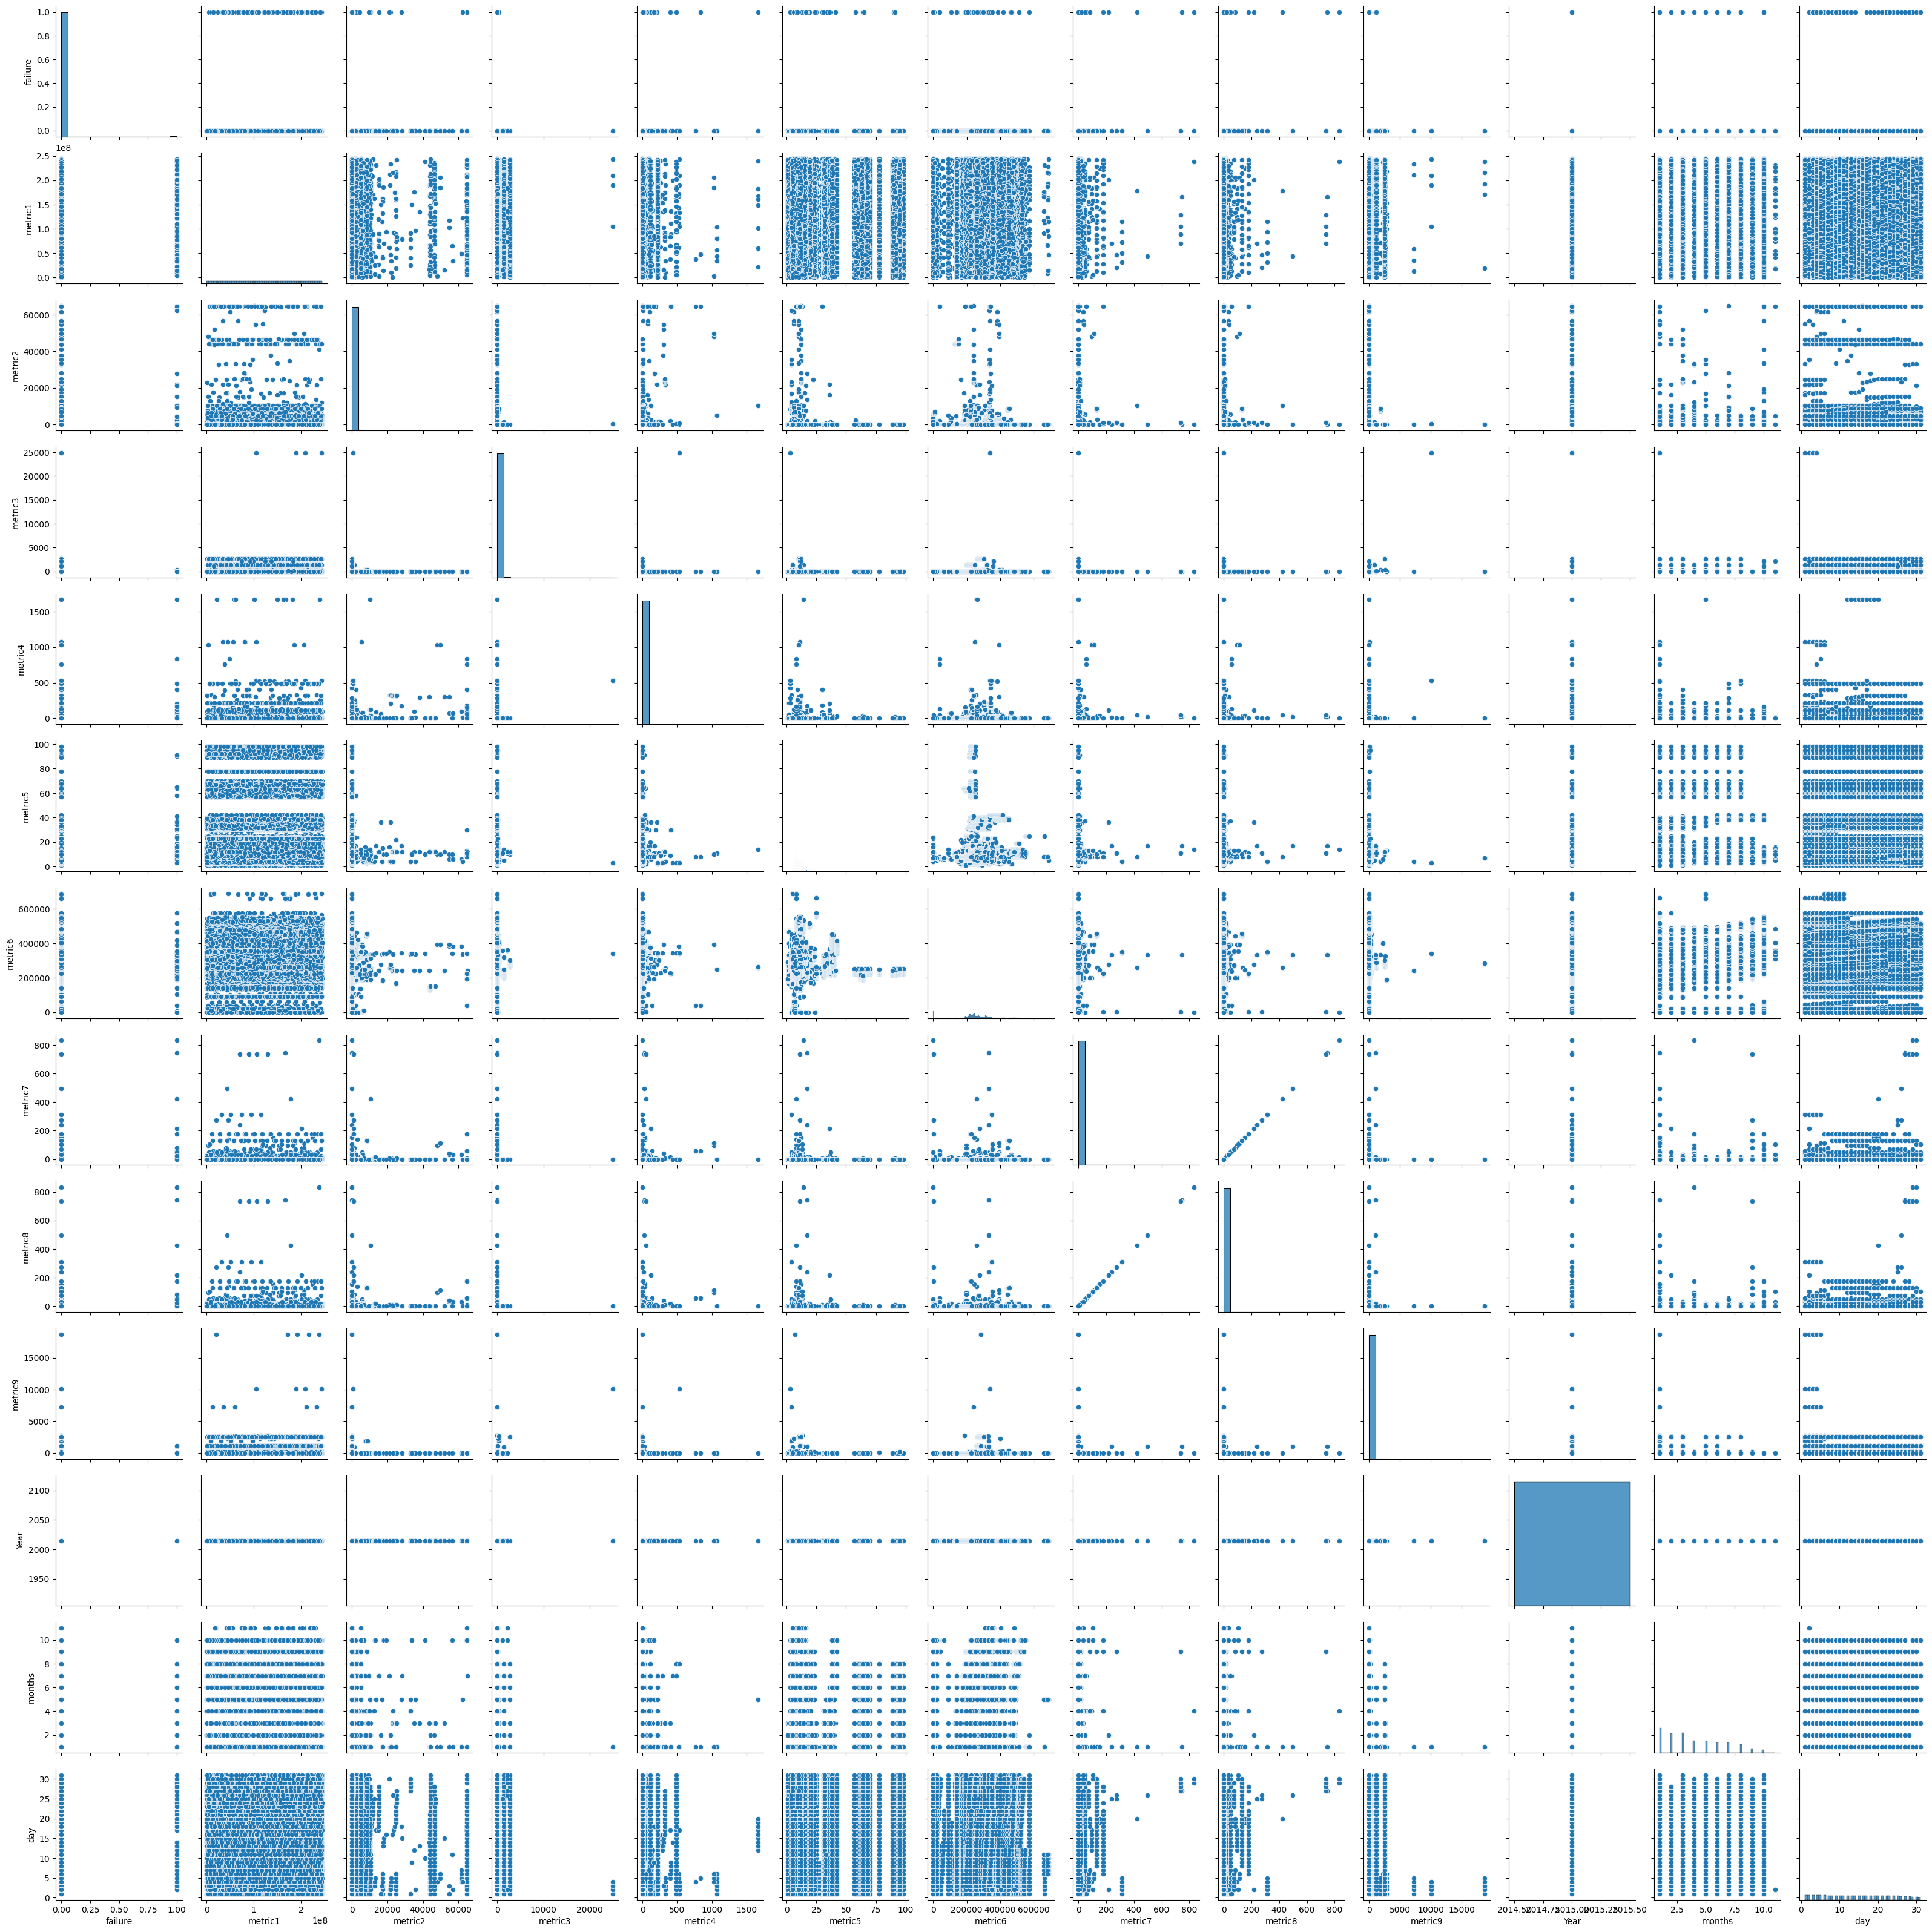

In [58]:
sns.pairplot(data)

Drop the year because the data is all about the 2015 

In [56]:
data.drop(columns=['Year'],inplace=True,axis=1)

In [57]:
data.head(5)

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       56        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric8  metric9  months  day  
0        6   407438        0        0        7       1    1  
1        6   403174        0        0        0       1    1  
2       12   237394        0        0        0       1    1  
3        6   410186        0        0        0       1    1  
4       15   313173        0        0        3       1    1

In [58]:
numerical_column

Index(['date', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'Year', 'months',
       'day'],
      dtype='object')

In [59]:
numerical_column=numerical_column.drop('Year')

In [60]:
data

date    device  failure    metric1  metric2  metric3  metric4  \
0      2015-01-01  S1F01085        0  215630672       56        0       52   
1      2015-01-01  S1F0166B        0   61370680        0        3        0   
2      2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3      2015-01-01  S1F01JE0        0   79694024        0        0        0   
4      2015-01-01  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489 2015-11-02  Z1F0MA1S        0   18310224        0        0        0   
124490 2015-11-02  Z1F0Q8RT        0  172556680       96      107        4   
124491 2015-11-02  Z1F0QK05        0   19029120     4832        0        0   
124492 2015-11-02  Z1F0QL3N        0  226953408        0        0        0   
124493 2015-11-02  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  months  day  
0             6   407438        0        0        7       1    1  
1             6   403174        0        0        0       1    1  
2            12   237394        0        0        0       1    1  
3             6   410186        0        0        0       1    1  
4            15   313173        0        0        3       1    1  
...         ...      ...      ...      ...      ...     ...  ...  
124489       10   353705        8        8        0      11    2  
124490       11   332792        0        0       13      11    2  
124491       11   350410        0        0        0      11    2  
124492       12   358980        0        0        0      11    2  
124493       10   351431        0        0        0      11    2  

[124493 rows x 14 columns]

<Axes: >

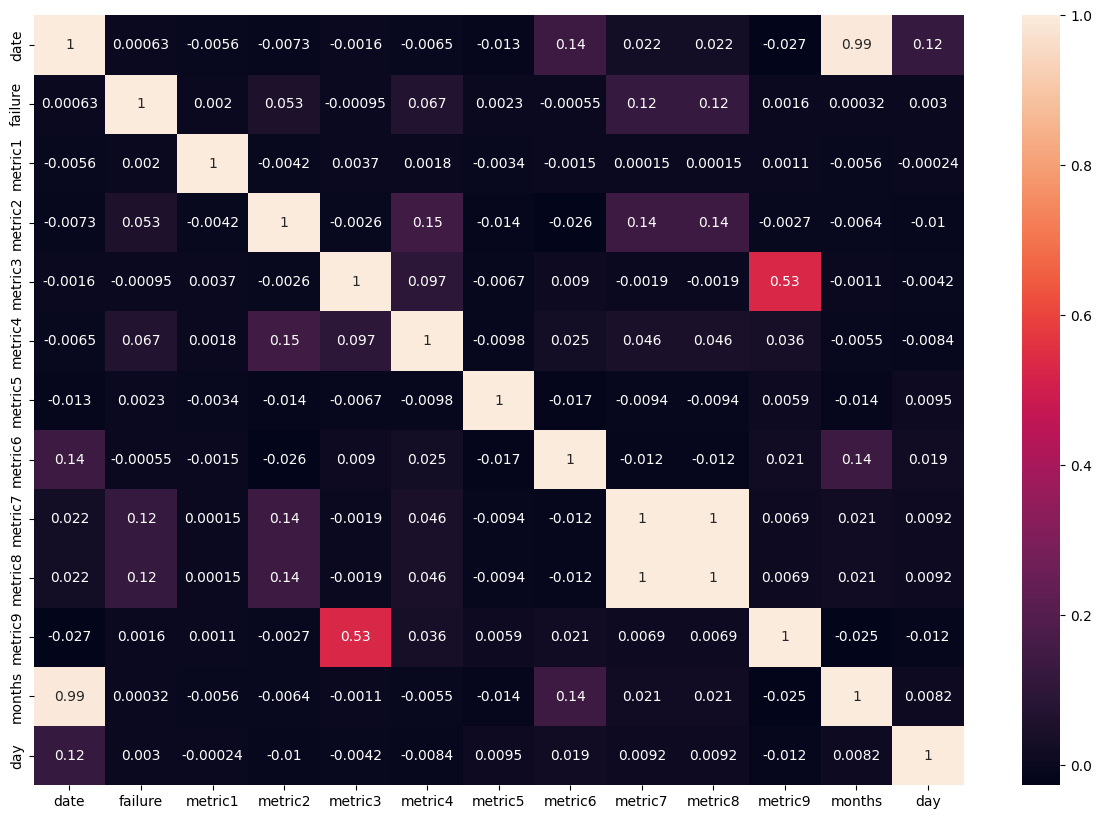

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(data[numerical_column].corr(),annot=True)

Plot the metric7 and metric8

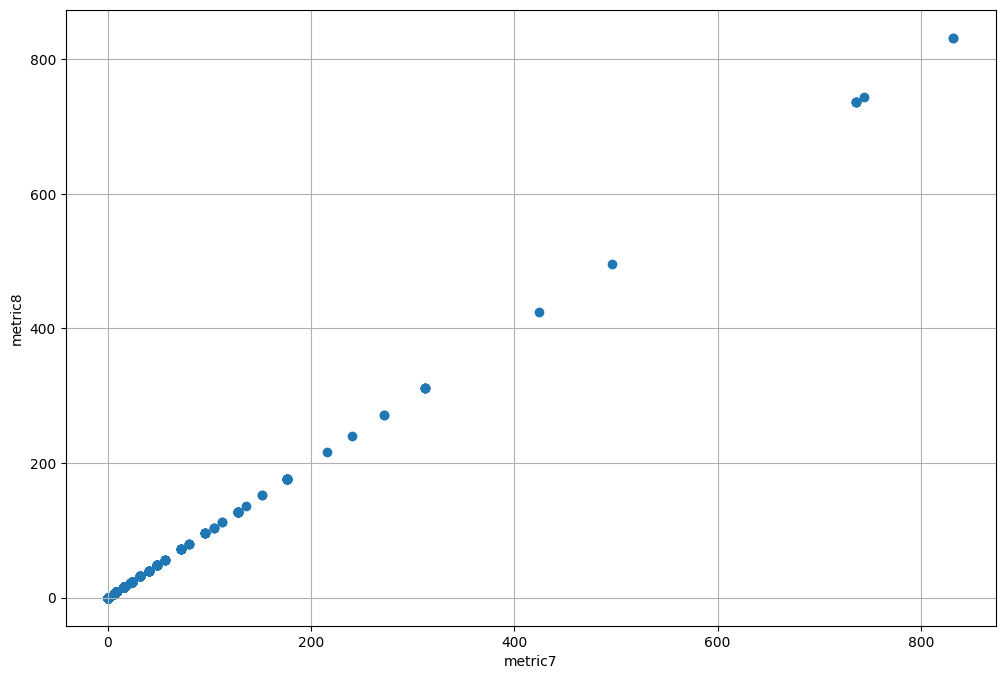

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(data['metric7'],data['metric8'])
plt.xlabel('metric7')
plt.ylabel('metric8')
plt.grid(True)
plt.show()

In [61]:
df['day']=df['day'].astype('int')
df['months']=df['months'].astype('int')

In [62]:
metric_colums=numerical_column.drop(['date'])

In [63]:
metric_colums

Index(['failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric8', 'metric9', 'months', 'day'],
      dtype='object')

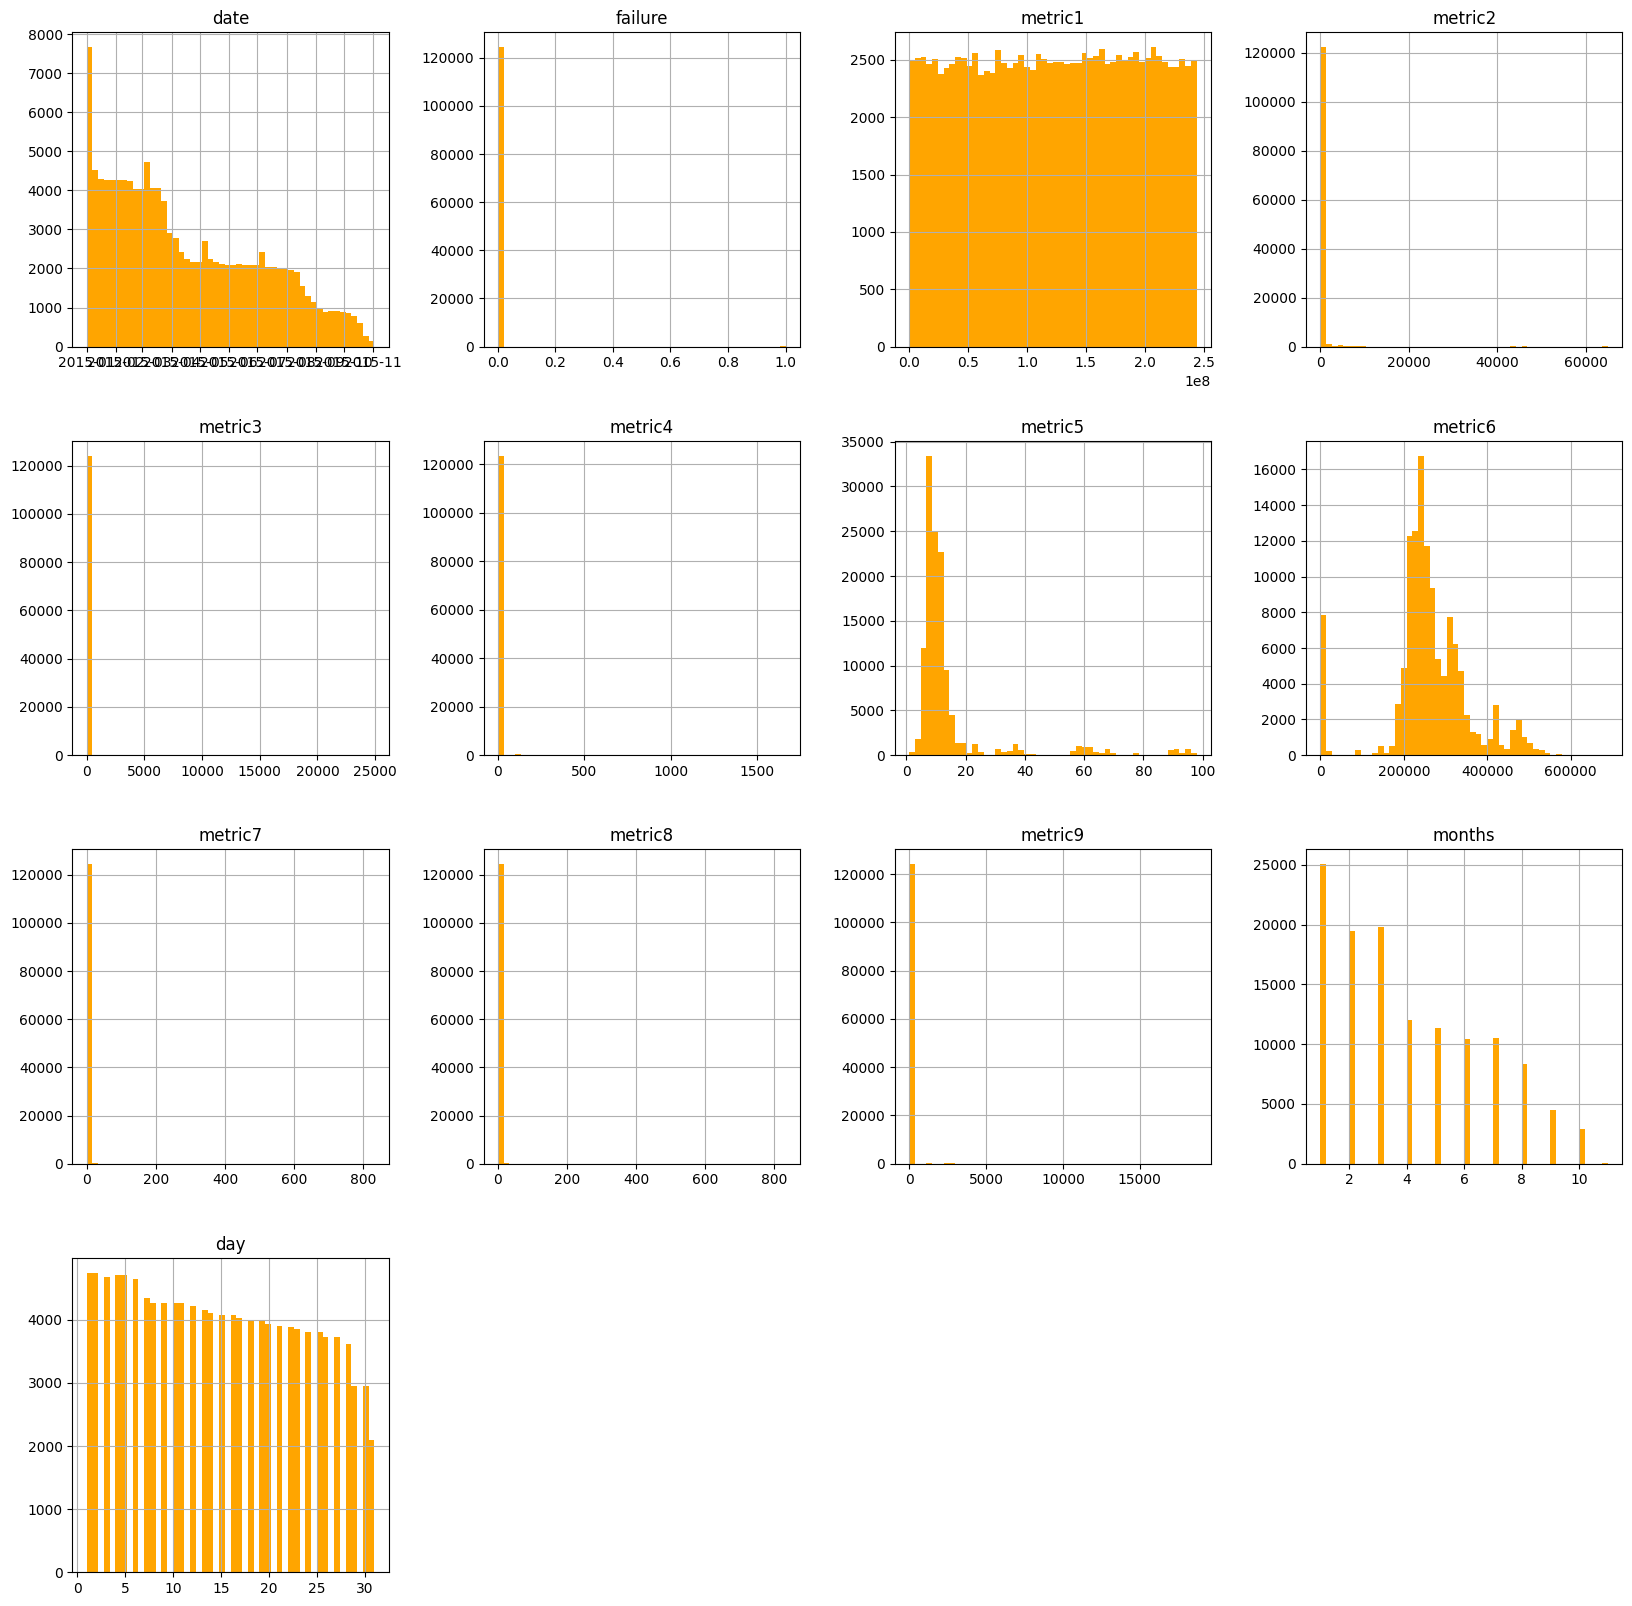

In [69]:
data.hist(bins=50,figsize=(20,20),color='orange')
plt.show()

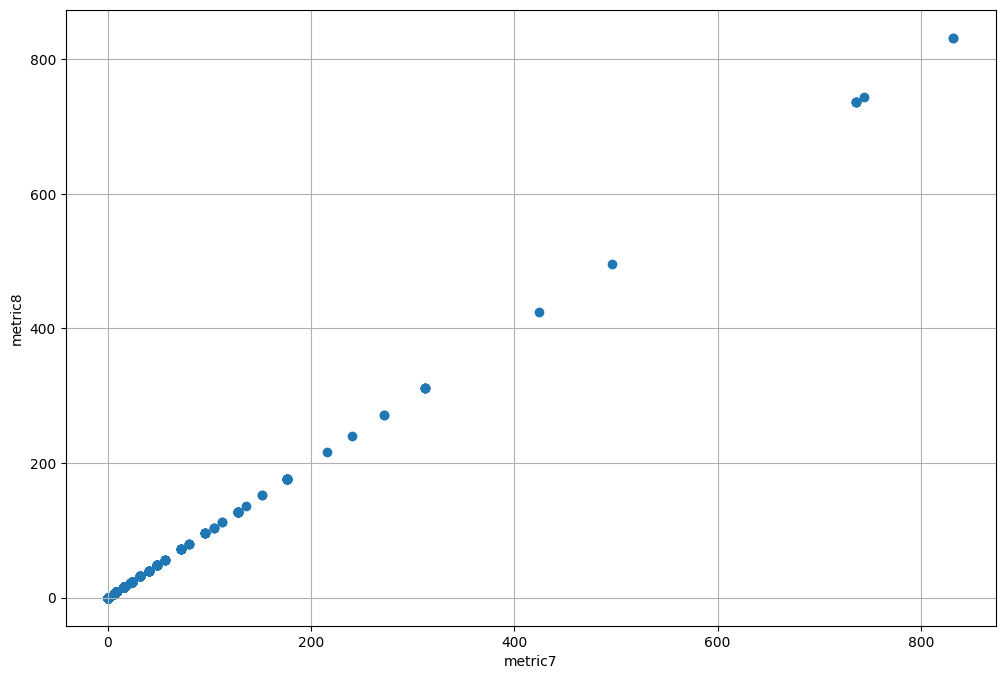

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(data['metric7'],data['metric8'])
plt.xlabel('metric7')
plt.ylabel('metric8')
plt.grid(True)
plt.show()

Drop the metric8

In [64]:
data.drop(columns=['metric8'],inplace=True,axis=1)

In [65]:
data1=data.copy()

In [66]:
data1.head(5)

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       56        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric9  months  day  
0        6   407438        0        7       1    1  
1        6   403174        0        0       1    1  
2       12   237394        0        0       1    1  
3        6   410186        0        0       1    1  
4       15   313173        0        3       1    1

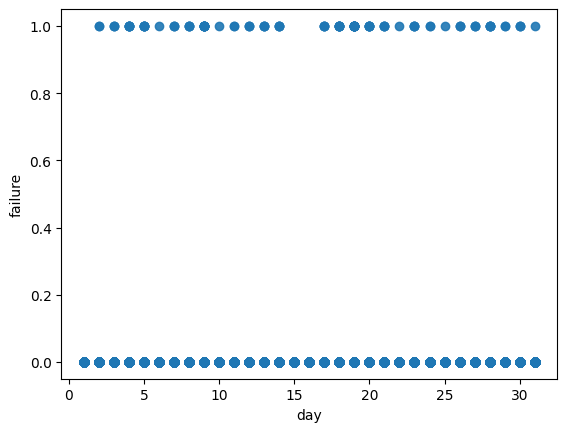

In [74]:
plt.scatter(data1['day'],data1['failure'],alpha=0.9)
plt.xlabel('day')
plt.ylabel('failure')
plt.show()

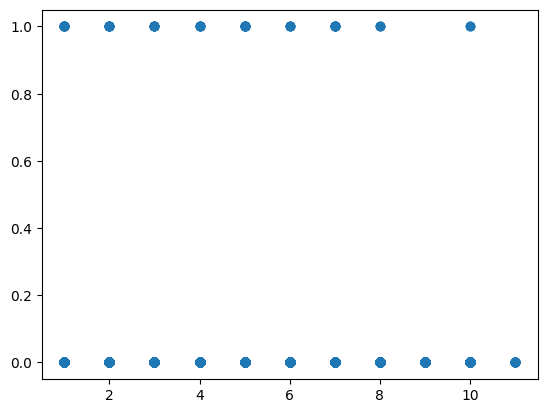

In [75]:
plt.scatter(data1['months'],data1['failure'],alpha=0.9)
plt.show()

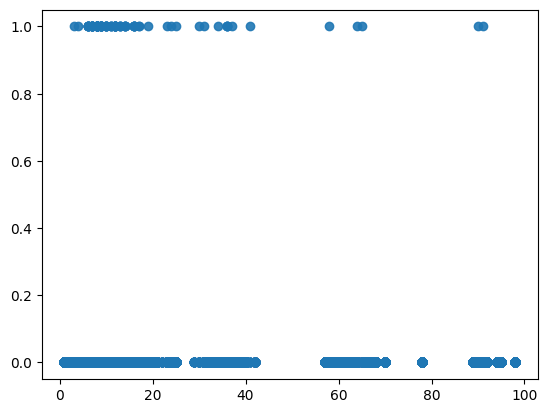

In [76]:
plt.scatter(data1['metric5'],data1['failure'],alpha=0.9)
plt.show()

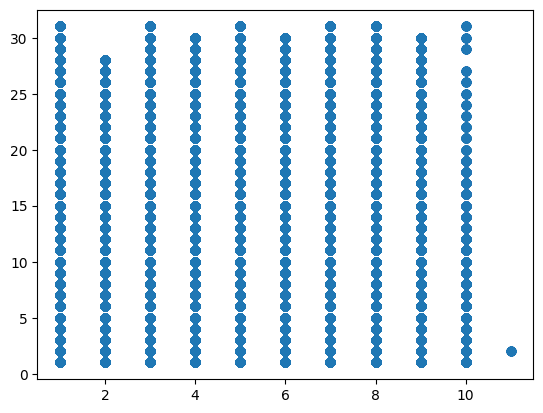

In [77]:
plt.scatter(data1['months'],data1['day'],alpha=0.9)
plt.show()

Get the model_name from the device 

In [67]:
data1['model_name']=data1['device'].apply(lambda x:x[:4])

In [68]:
data1.head(5)

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       56        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric9  months  day model_name  
0        6   407438        0        7       1    1       S1F0  
1        6   403174        0        0       1    1       S1F0  
2       12   237394        0        0       1    1       S1F0  
3        6   410186        0        0       1    1       S1F0  
4       15   313173        0        3       1    1       S1F0

In [69]:
data1.model_name.unique()

array(['S1F0', 'S1F1', 'W1F0', 'W1F1', 'Z1F0', 'Z1F1', 'Z1F2'],
      dtype=object)

Text(0, 0.5, 'failure')

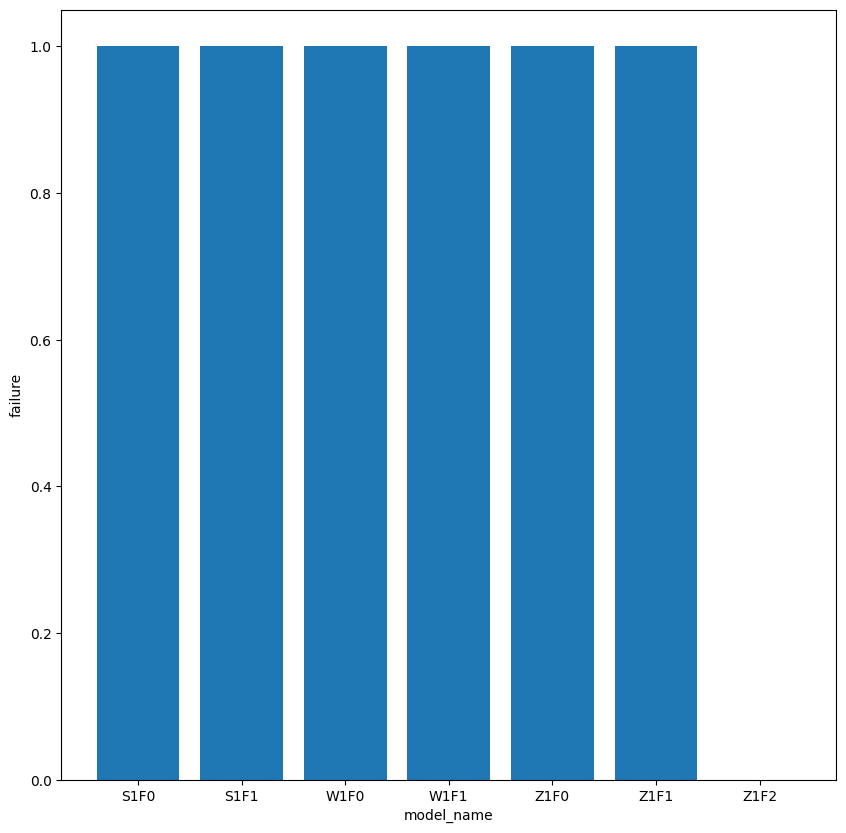

In [67]:
plt.figure(figsize=(10,10))
plt.bar(x=data1['model_name'],height=data1['failure'])
plt.xlabel('model_name')
plt.ylabel('failure')

In [70]:
data1['model_name'].value_counts()

model_name
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

In [71]:
# # Assuming `data` is your DataFrame and you want to remove rows where `model_name` equals 'Z1F2'
# data = data[data['model_name'] != 'Z1F2']


In [72]:
data1['model_name'].unique()

array(['S1F0', 'S1F1', 'W1F0', 'W1F1', 'Z1F0', 'Z1F1', 'Z1F2'],
      dtype=object)

Oridnal Encoder is for give encode the string into integer samples because models learn only the numerical value not the string values so we encode by apply the ordinalEncoder to give the rank based on my choice .

In [73]:
from sklearn.preprocessing import OrdinalEncoder
label=OrdinalEncoder(categories=[['S1F0', 'S1F1', 'W1F0', 'W1F1', 'Z1F0', 'Z1F1', 'Z1F2']])
data1['model_name']=label.fit_transform(data1[['model_name']])


In [74]:
data1

date    device  failure    metric1  metric2  metric3  metric4  \
0      2015-01-01  S1F01085        0  215630672       56        0       52   
1      2015-01-01  S1F0166B        0   61370680        0        3        0   
2      2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3      2015-01-01  S1F01JE0        0   79694024        0        0        0   
4      2015-01-01  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489 2015-11-02  Z1F0MA1S        0   18310224        0        0        0   
124490 2015-11-02  Z1F0Q8RT        0  172556680       96      107        4   
124491 2015-11-02  Z1F0QK05        0   19029120     4832        0        0   
124492 2015-11-02  Z1F0QL3N        0  226953408        0        0        0   
124493 2015-11-02  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric9  months  day  model_name  
0             6   407438        0        7       1    1         0.0  
1             6   403174        0        0       1    1         0.0  
2            12   237394        0        0       1    1         0.0  
3             6   410186        0        0       1    1         0.0  
4            15   313173        0        3       1    1         0.0  
...         ...      ...      ...      ...     ...  ...         ...  
124489       10   353705        8        0      11    2         4.0  
124490       11   332792        0       13      11    2         4.0  
124491       11   350410        0        0      11    2         4.0  
124492       12   358980        0        0      11    2         4.0  
124493       10   351431        0        0      11    2         4.0  

[124493 rows x 14 columns]

In [75]:
# plt.figure(figsize=(10,10))
# plt.pie(x=data['failure'],labels=data['model_name'])
# plt.legend()
# plt.show()

Drop the Device because we extract the model_name from device fetaures and split the date into the months,day,Year 

In [76]:
data1.drop(columns=['device'],inplace=True,axis=1)

In [77]:
data1.drop(columns=['date'],inplace=True,axis=1)
data1.dtypes

failure         int64
metric1         int64
metric2         int64
metric3         int64
metric4         int64
metric5         int64
metric6         int64
metric7         int64
metric9         int64
months          int64
day             int64
model_name    float64
dtype: object

for unsampling because data is imbalance for making the balance we can do either undersampling or oversampling .we do both and get the result in which sampling techniques model learn perfect .

In [78]:
from imblearn.under_sampling import RandomUnderSampler

In [79]:
data1['model_name'].unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [80]:
data1

failure    metric1  metric2  metric3  metric4  metric5  metric6  \
0             0  215630672       56        0       52        6   407438   
1             0   61370680        0        3        0        6   403174   
2             0  173295968        0        0        0       12   237394   
3             0   79694024        0        0        0        6   410186   
4             0  135970480        0        0        0       15   313173   
...         ...        ...      ...      ...      ...      ...      ...   
124489        0   18310224        0        0        0       10   353705   
124490        0  172556680       96      107        4       11   332792   
124491        0   19029120     4832        0        0       11   350410   
124492        0  226953408        0        0        0       12   358980   
124493        0   17572840        0        0        0       10   351431   

        metric7  metric9  months  day  model_name  
0             0        7       1    1         0.0  
1             0        0       1    1         0.0  
2             0        0       1    1         0.0  
3             0        0       1    1         0.0  
4             0        3       1    1         0.0  
...         ...      ...     ...  ...         ...  
124489        8        0      11    2         4.0  
124490        0       13      11    2         4.0  
124491        0        0      11    2         4.0  
124492        0        0      11    2         4.0  
124493        0        0      11    2         4.0  

[124493 rows x 12 columns]

Split the independent features and Dependent Features and Give to X and y variables for train_test_split 

In [81]:
X=data1.drop(columns='failure',axis=1)

In [82]:
X

metric1  metric2  metric3  metric4  metric5  metric6  metric7  \
0       215630672       56        0       52        6   407438        0   
1        61370680        0        3        0        6   403174        0   
2       173295968        0        0        0       12   237394        0   
3        79694024        0        0        0        6   410186        0   
4       135970480        0        0        0       15   313173        0   
...           ...      ...      ...      ...      ...      ...      ...   
124489   18310224        0        0        0       10   353705        8   
124490  172556680       96      107        4       11   332792        0   
124491   19029120     4832        0        0       11   350410        0   
124492  226953408        0        0        0       12   358980        0   
124493   17572840        0        0        0       10   351431        0   

        metric9  months  day  model_name  
0             7       1    1         0.0  
1             0       1    1         0.0  
2             0       1    1         0.0  
3             0       1    1         0.0  
4             3       1    1         0.0  
...         ...     ...  ...         ...  
124489        0      11    2         4.0  
124490       13      11    2         4.0  
124491        0      11    2         4.0  
124492        0      11    2         4.0  
124493        0      11    2         4.0  

[124493 rows x 11 columns]

In [83]:
data1.dtypes

failure         int64
metric1         int64
metric2         int64
metric3         int64
metric4         int64
metric5         int64
metric6         int64
metric7         int64
metric9         int64
months          int64
day             int64
model_name    float64
dtype: object

In [84]:
X

metric1  metric2  metric3  metric4  metric5  metric6  metric7  \
0       215630672       56        0       52        6   407438        0   
1        61370680        0        3        0        6   403174        0   
2       173295968        0        0        0       12   237394        0   
3        79694024        0        0        0        6   410186        0   
4       135970480        0        0        0       15   313173        0   
...           ...      ...      ...      ...      ...      ...      ...   
124489   18310224        0        0        0       10   353705        8   
124490  172556680       96      107        4       11   332792        0   
124491   19029120     4832        0        0       11   350410        0   
124492  226953408        0        0        0       12   358980        0   
124493   17572840        0        0        0       10   351431        0   

        metric9  months  day  model_name  
0             7       1    1         0.0  
1             0       1    1         0.0  
2             0       1    1         0.0  
3             0       1    1         0.0  
4             3       1    1         0.0  
...         ...     ...  ...         ...  
124489        0      11    2         4.0  
124490       13      11    2         4.0  
124491        0      11    2         4.0  
124492        0      11    2         4.0  
124493        0      11    2         4.0  

[124493 rows x 11 columns]

In [85]:
y=data1['failure']

Do Undersapling for making the data balance 


In [86]:
im=RandomUnderSampler()

In [87]:
X_under,y_under=im.fit_resample(X,y)

<Axes: xlabel='failure', ylabel='count'>

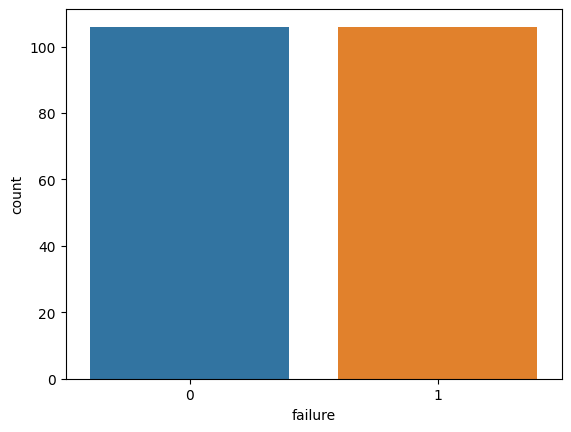

In [88]:
sns.countplot(data=data,x=y_under)

Observation :convert into balance data by undersampling by there is a loss of infomation

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB             
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


Models defined in a dictionary

In [91]:
models={
     'LogisticRegression':LogisticRegression(),
     'SVC':SVC(),
     'DecisionTreeClassifier':DecisionTreeClassifier(),
     'GaussianNB':GaussianNB(),
     'RandomForestClassifier':RandomForestClassifier(),
     'KNeighborsClassifier':KNeighborsClassifier(),
     'AdaBoostClassifier':AdaBoostClassifier(learning_rate=1)
}

Train_test_split ,Test_size is 22% of the total data and 78% samples for training 

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_under,y_under,test_size=0.22,random_state=42)

This is Prevent the Skewness and convert to normal distribution so that model do not bias .
Note: I prefer the logarithm method to avoid the right skewness after the train test split due to prevent the data Leakage

In [93]:
for num in ["2","3","4","7","9"]:
    X_train[f'metric{num}'] = np.log1p(X_train[f'metric{num}'])
    
for num in ["2","3","4","7","9"]:
    X_test[f'metric{num}'] = np.log1p(X_test[f'metric{num}'])

Do Standarization to convert the data to a particular range 

In [94]:
scale=StandardScaler()
X_train_sampled=scale.fit_transform(X_train)

In [95]:
X_test_sampled=scale.transform(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


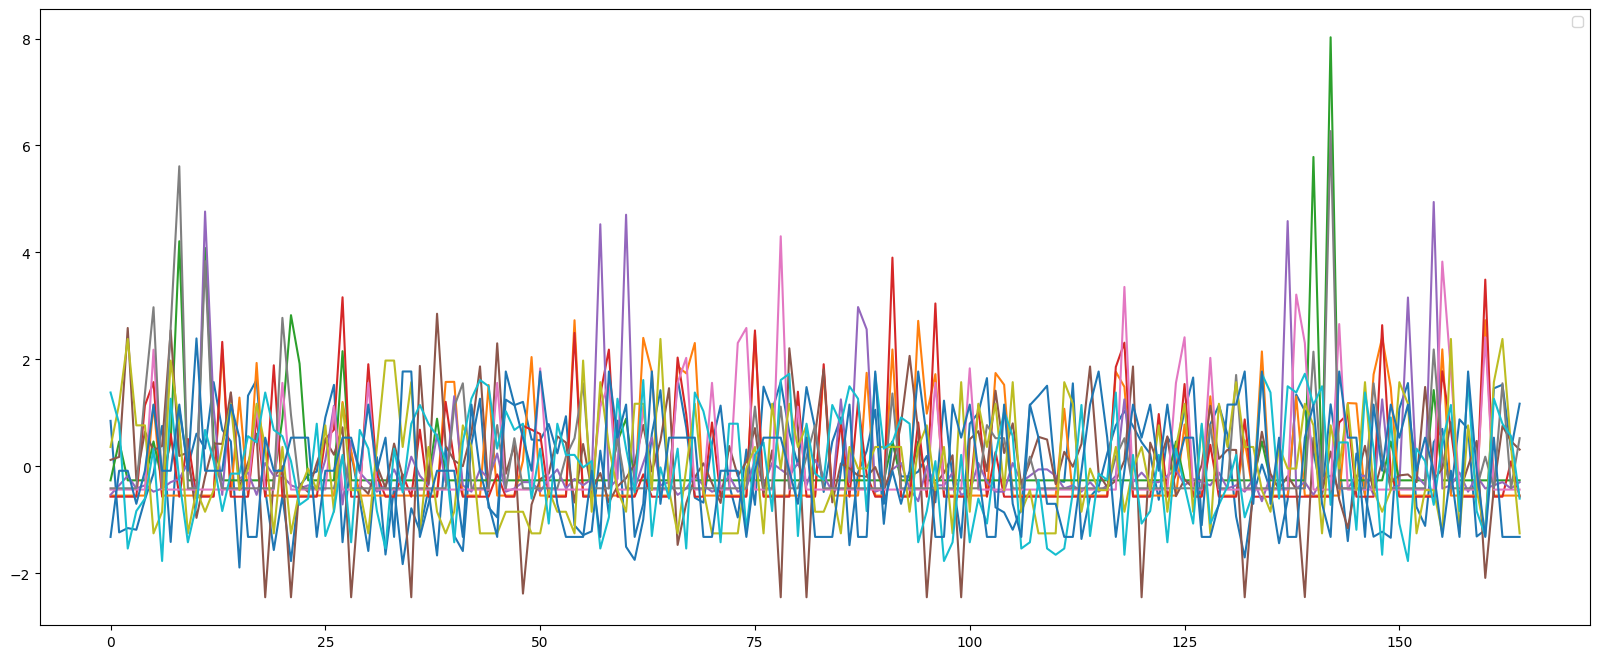

In [93]:
plt.figure(figsize=(20,8))
plt.plot(X_train_sampled)
plt.legend()
plt.show()

Observation:This plot say that now the data is on a particular range 

In [96]:
# X_test_sampled

Do the PCA (Principal Component Analysis a Unsupervised Techniue) for reduce the dimension of data and for making the training faster 

In [97]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_sampled = pca.fit_transform(X_train_sampled)
X_test_sampled = pca.transform(X_test_sampled)


In [98]:
explanined_pca_ratio=pca.explained_variance_ratio_

In [99]:
explanined_pca_ratio

array([0.16662906, 0.15246625, 0.11473091, 0.10687578, 0.10002005,
       0.09194813, 0.07425824, 0.06141216, 0.06010022, 0.03879234,
       0.03276686])

In [100]:
X_train_sampled

array([[-0.78292445, -0.6051569 , -0.57703832, ...,  0.26692129,
         0.25035429,  0.20192512],
       [-1.22652095,  0.24868754, -1.09222947, ...,  0.29741729,
        -0.25110034, -0.03338059],
       [-0.64139429, -0.98482999,  1.54901881, ..., -0.58469851,
         0.11849236, -0.22518533],
       ...,
       [-0.75511628, -0.26051769,  0.31943153, ..., -1.0796478 ,
         0.0279251 , -0.1689878 ],
       [-0.46726493, -0.09788206, -0.61540727, ..., -0.45576944,
         0.29056379, -0.45200362],
       [-0.65986367, -0.4614434 ,  0.28845797, ..., -0.41196451,
         0.12227084, -0.06332643]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


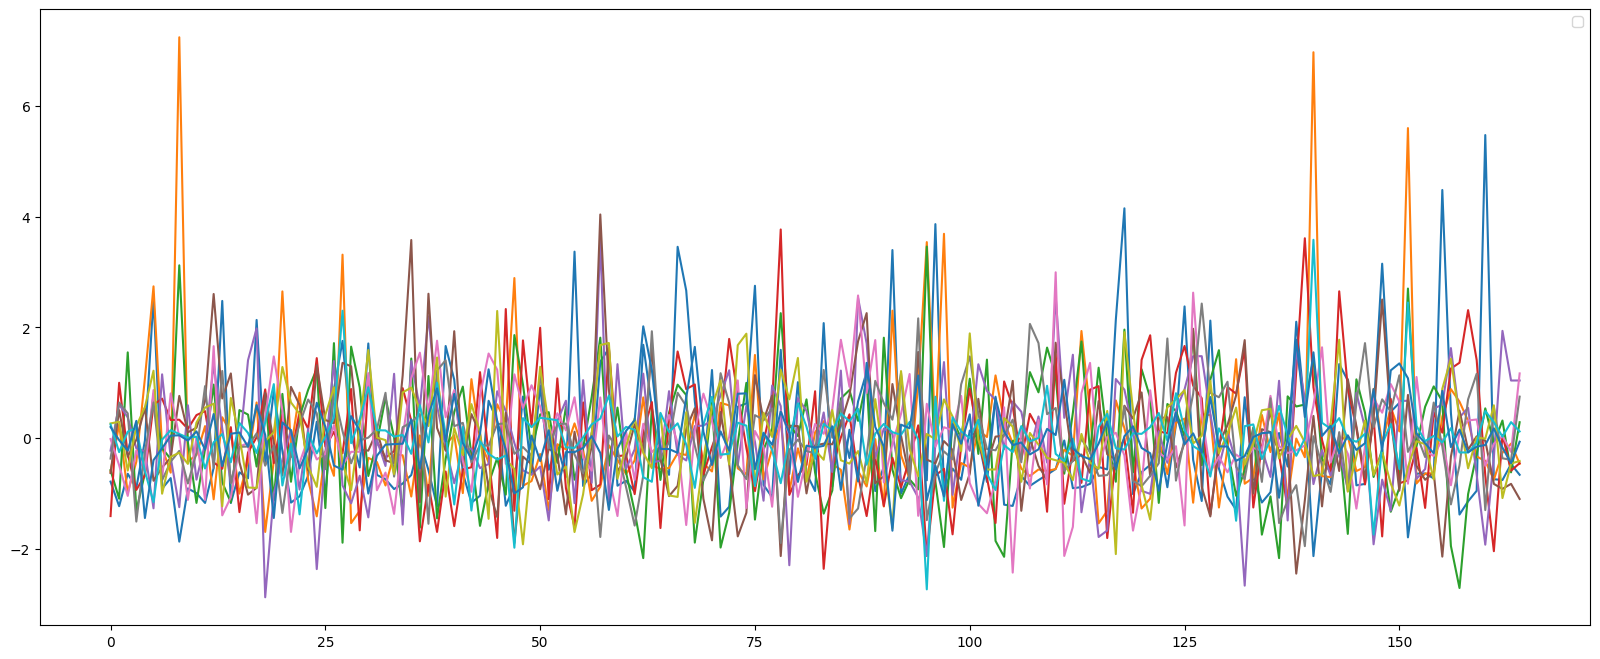

In [101]:
plt.figure(figsize=(20,8))
plt.plot(X_train_sampled)
plt.legend()
plt.show()

Train the Model on different Machine Learning Algorithm 

Model name is: LogisticRegression
=============Confusion matrix=============== 
[[20  1]
 [ 8 18]]
==============ROC Curve====================== 


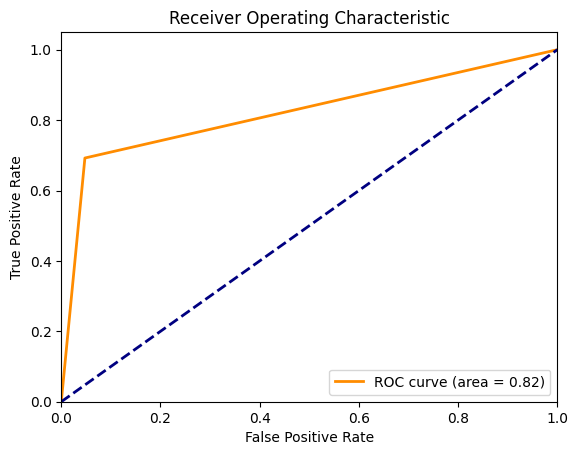

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.95      0.69      0.80        26

    accuracy                           0.81        47
   macro avg       0.83      0.82      0.81        47
weighted avg       0.84      0.81      0.81        47

Accuracy score is: 0.8085106382978723
f1_score is :0.7999999999999999
Precision score is :0.9473684210526315
Recall score is 0.6923076923076923
Model name is: SVC
=============Confusion matrix=============== 
[[20  1]
 [ 6 20]]
==============ROC Curve====================== 


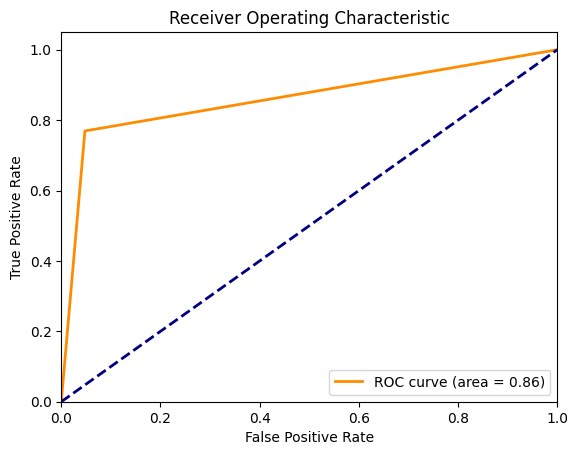

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.95      0.77      0.85        26

    accuracy                           0.85        47
   macro avg       0.86      0.86      0.85        47
weighted avg       0.87      0.85      0.85        47

Accuracy score is: 0.851063829787234
f1_score is :0.8510638297872339
Precision score is :0.9523809523809523
Recall score is 0.7692307692307693
Model name is: DecisionTreeClassifier
=============Confusion matrix=============== 
[[15  6]
 [ 9 17]]
==============ROC Curve====================== 


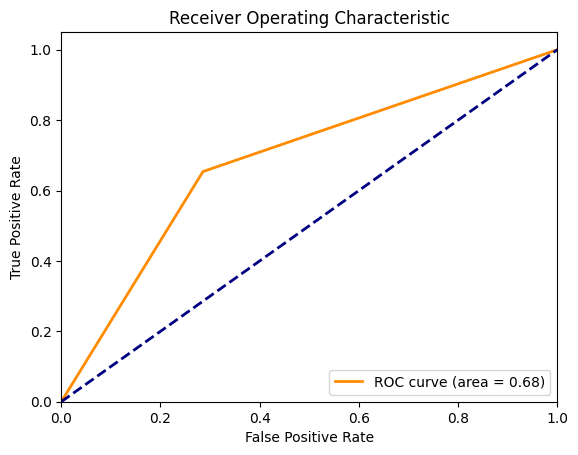

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        21
           1       0.74      0.65      0.69        26

    accuracy                           0.68        47
   macro avg       0.68      0.68      0.68        47
weighted avg       0.69      0.68      0.68        47

Accuracy score is: 0.6808510638297872
f1_score is :0.693877551020408
Precision score is :0.7391304347826086
Recall score is 0.6538461538461539
Model name is: GaussianNB
=============Confusion matrix=============== 
[[17  4]
 [ 7 19]]
==============ROC Curve====================== 


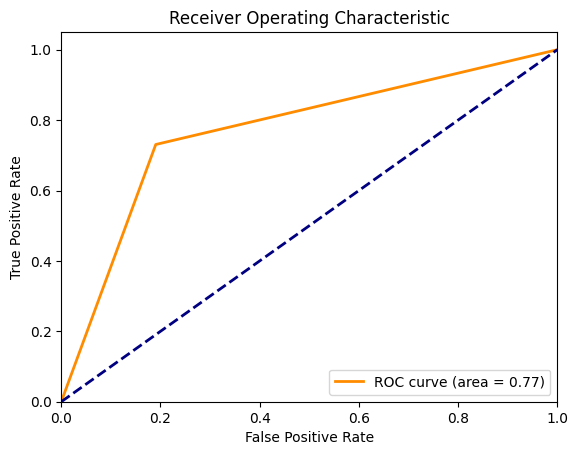

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        21
           1       0.83      0.73      0.78        26

    accuracy                           0.77        47
   macro avg       0.77      0.77      0.77        47
weighted avg       0.77      0.77      0.77        47

Accuracy score is: 0.7659574468085106
f1_score is :0.7755102040816326
Precision score is :0.8260869565217391
Recall score is 0.7307692307692307
Model name is: RandomForestClassifier
=============Confusion matrix=============== 
[[17  4]
 [ 7 19]]
==============ROC Curve====================== 


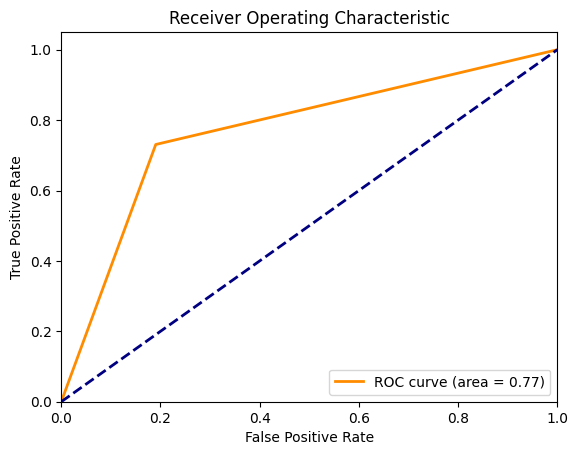

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        21
           1       0.83      0.73      0.78        26

    accuracy                           0.77        47
   macro avg       0.77      0.77      0.77        47
weighted avg       0.77      0.77      0.77        47

Accuracy score is: 0.7659574468085106
f1_score is :0.7755102040816326
Precision score is :0.8260869565217391
Recall score is 0.7307692307692307
Model name is: KNeighborsClassifier
=============Confusion matrix=============== 
[[19  2]
 [11 15]]
==============ROC Curve====================== 


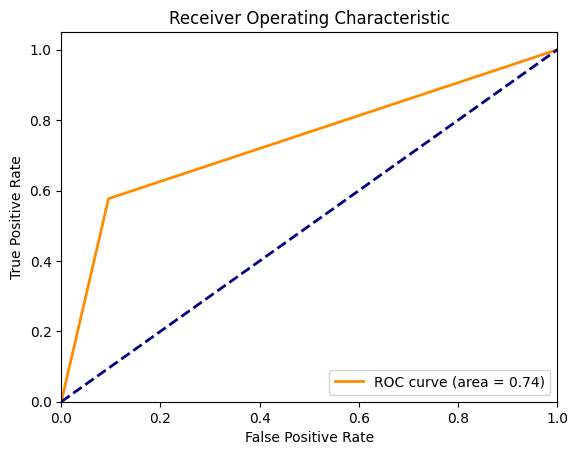

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.63      0.90      0.75        21
           1       0.88      0.58      0.70        26

    accuracy                           0.72        47
   macro avg       0.76      0.74      0.72        47
weighted avg       0.77      0.72      0.72        47

Accuracy score is: 0.723404255319149
f1_score is :0.6976744186046512
Precision score is :0.8823529411764706
Recall score is 0.5769230769230769
Model name is: AdaBoostClassifier
=============Confusion matrix=============== 
[[19  2]
 [ 7 19]]
==============ROC Curve====================== 


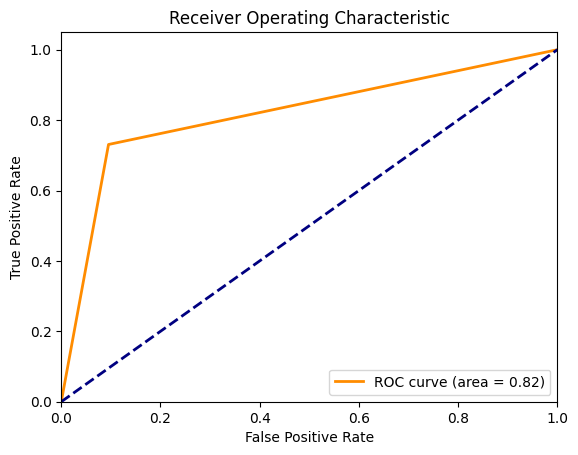

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.90      0.73      0.81        26

    accuracy                           0.81        47
   macro avg       0.82      0.82      0.81        47
weighted avg       0.83      0.81      0.81        47

Accuracy score is: 0.8085106382978723
f1_score is :0.8085106382978723
Precision score is :0.9047619047619048
Recall score is 0.7307692307692307


In [100]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

accuracy_list = []
f1_score_list = []
Recall_list = []
Precision_list = []
auc_list = []  # Renamed from 'auc' to 'auc_list'
mode = []

for model_name, model_obj in models.items():
    print(f"Model name is: {model_name}")
    # Fit the model with your training data
    model_obj.fit(X_train_sampled, y_train)  # Make sure your training data variable names are correct
    # Predict using your test data
    y_pred = model_obj.predict(X_test_sampled)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Ensure y_test and y_pred are correctly defined
    roc_auc = auc(fpr, tpr)  # Now auc is correctly referred as the function
    
    print("=============Confusion matrix=============== ")
    # Print the confusion matrix
    print(confusion_matrix(y_test, y_pred))
    
    print("==============ROC Curve====================== ")
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("==================Classification report ================== ")
    print(classification_report(y_test, y_pred))
    mode.append(model_name)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    f1_scor = f1_score(y_test, y_pred)
    f1_score_list.append(f1_scor)
    au = roc_auc_score(y_test, y_pred)
    auc_list.append(au)  # Use the renamed 'auc_list' here
    pr = precision_score(y_test, y_pred)
    Precision_list.append(pr)
    re = recall_score(y_test, y_pred)
    Recall_list.append(re)
    
    # Print the accuracy score
    print(f"Accuracy score is: {accuracy}")
    print(f"f1_score is :{f1_scor}")
    print(f"Precision score is :{pr}")
    print(f"Recall score is {re}")
    print("=" * 40)


In [101]:
frame = pd.DataFrame({
     'models':mode,
    'accuracy': accuracy_list,
    'f1_score': f1_score_list,
    'recall': Recall_list,
    'precision': Precision_list,
    'auc': auc_list  
})
frame

models  accuracy  f1_score    recall  precision       auc
0      LogisticRegression  0.808511  0.800000  0.692308   0.947368  0.822344
1                     SVC  0.851064  0.851064  0.769231   0.952381  0.860806
2  DecisionTreeClassifier  0.680851  0.693878  0.653846   0.739130  0.684066
3              GaussianNB  0.765957  0.775510  0.730769   0.826087  0.770147
4  RandomForestClassifier  0.765957  0.775510  0.730769   0.826087  0.770147
5    KNeighborsClassifier  0.723404  0.697674  0.576923   0.882353  0.740842
6      AdaBoostClassifier  0.808511  0.808511  0.730769   0.904762  0.817766

Observation :After Undersampling result not well 

Accuracy is not good so we can also try the oversampling 

Oversampling

In [102]:
###SMOTE Oversampling

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
data1.columns

Index(['failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric9', 'months', 'day', 'model_name'],
      dtype='object')

In [105]:
data1['model_name'].dtype

dtype('float64')

In [106]:
oversample=SMOTE()
X_over,y_over=oversample.fit_resample(data1[[ 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric9', 'months', 'day', 'model_name']],data1['failure'])

In [107]:
X_over.shape

(248774, 11)

In [108]:
y_over.shape

(248774,)

In [109]:
X_over

metric1  metric2  metric3  metric4  metric5  metric6  metric7  \
0       215630672       56        0       52        6   407438        0   
1        61370680        0        3        0        6   403174        0   
2       173295968        0        0        0       12   237394        0   
3        79694024        0        0        0        6   410186        0   
4       135970480        0        0        0       15   313173        0   
...           ...      ...      ...      ...      ...      ...      ...   
248769  149638605        0      177        0        9   270585        7   
248770  239981545     3320        0        8        6   315601        6   
248771   45768444    20496        0      190       36   276280        0   
248772  149949050      678        0       60       11   217426        0   
248773  238306155      997        0        0       14   226366      137   

        metric9  months  day  model_name  
0             7       1    1    0.000000  
1             0       1    1    0.000000  
2             0       1    1    0.000000  
3             0       1    1    0.000000  
4             3       1    1    0.000000  
...         ...     ...  ...         ...  
248769       10       5   22    3.110428  
248770        0       7   18    0.000000  
248771        1       2    2    2.000000  
248772        0       2   26    0.000000  
248773        0       1   20    0.472370  

[248774 rows x 11 columns]

<Axes: xlabel='failure', ylabel='count'>

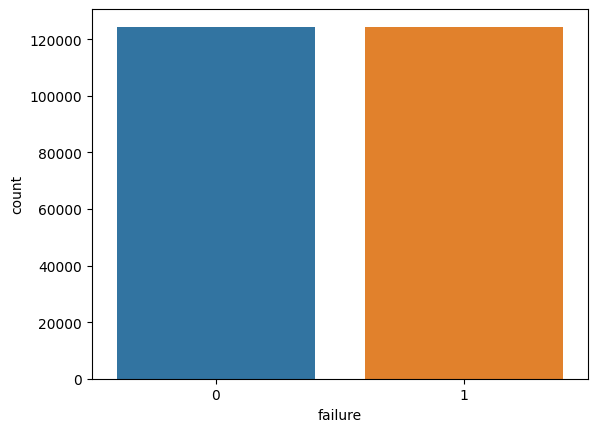

In [110]:
sns.countplot(data=data1,x=y_over)

Train Test Split after oversampling 

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.22,random_state=42)

Logarithm method to avoid the skewness

In [114]:
for num in ["2","3","4","7","9"]:
    X_train[f'metric{num}'] = np.log1p(X_train[f'metric{num}'])
    
for num in ["2","3","4","7","9"]:
    X_test[f'metric{num}'] = np.log1p(X_test[f'metric{num}'])

Standardizing means standard deviation is 1 and mean is 0.Scale the data into the particular range 

In [115]:
scale=StandardScaler()
X_train_sampled=scale.fit_transform(X_train)

In [116]:
X_test_sampled=scale.transform(X_test)

In [117]:
# from sklearn.decomposition import PCA
# pca = PCA()
# X_train_sampled = pca.fit_transform(X_train_sampled)
# X_test_sampled = pca.transform(X_test_sampled)


In [118]:
y_train.shape,y_test.shape
194043+54731

248774

Model name is: LogisticRegression
=============Confusion matrix=============== 
[[25485  1761]
 [ 3439 24046]]
==============ROC Curve====================== 


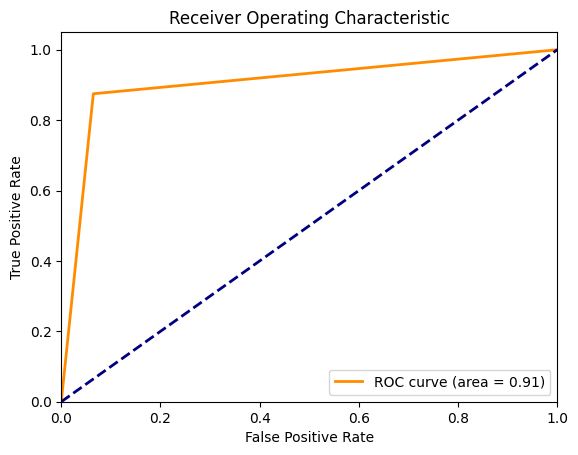

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     27246
           1       0.93      0.87      0.90     27485

    accuracy                           0.90     54731
   macro avg       0.91      0.91      0.90     54731
weighted avg       0.91      0.90      0.90     54731

Accuracy score is: 0.9049898594946192
f1_score is :0.9024243788936426
Precision score is :0.9317627000426241
Recall score is 0.8748772057485902
Model name is: SVC


=============Confusion matrix=============== 
[[26723   523]
 [  741 26744]]
==============ROC Curve====================== 


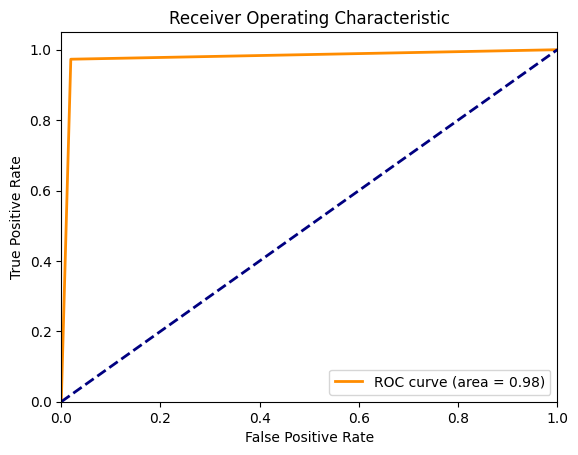

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     27246
           1       0.98      0.97      0.98     27485

    accuracy                           0.98     54731
   macro avg       0.98      0.98      0.98     54731
weighted avg       0.98      0.98      0.98     54731

Accuracy score is: 0.9769052273848459
f1_score is :0.9769140853302162
Precision score is :0.9808193053874646
Recall score is 0.9730398399126796
Model name is: DecisionTreeClassifier
=============Confusion matrix=============== 
[[27199    47]
 [   19 27466]]
==============ROC Curve====================== 


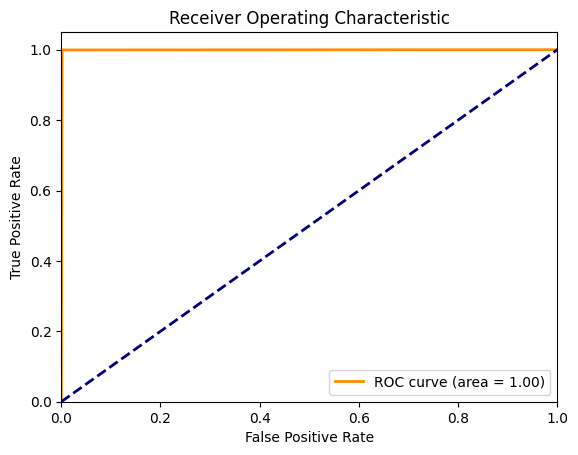

==================Classification report ================== 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27246
           1       1.00      1.00      1.00     27485

    accuracy                           1.00     54731
   macro avg       1.00      1.00      1.00     54731
weighted avg       1.00      1.00      1.00     54731

Accuracy score is: 0.9987941020628163
f1_score is :0.9987999563620495
Precision score is :0.9982917166430415
Recall score is 0.9993087138439148
Model name is: GaussianNB
=============Confusion matrix=============== 
[[25219  2027]
 [ 3430 24055]]
==============ROC Curve====================== 


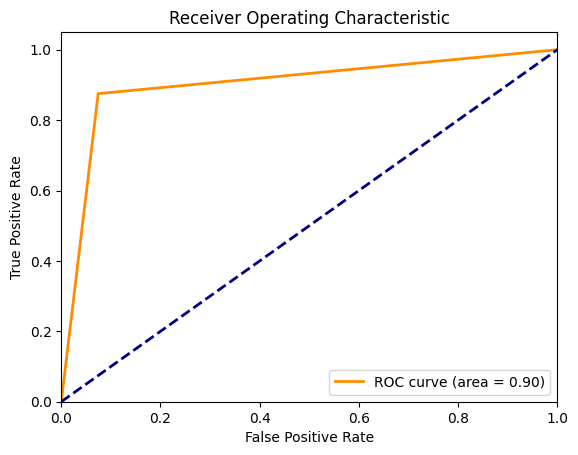

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     27246
           1       0.92      0.88      0.90     27485

    accuracy                           0.90     54731
   macro avg       0.90      0.90      0.90     54731
weighted avg       0.90      0.90      0.90     54731

Accuracy score is: 0.9002941660119493
f1_score is :0.8981275785464933
Precision score is :0.9222835672111035
Recall score is 0.8752046570856831
Model name is: RandomForestClassifier
=============Confusion matrix=============== 
[[27235    11]
 [    6 27479]]
==============ROC Curve====================== 


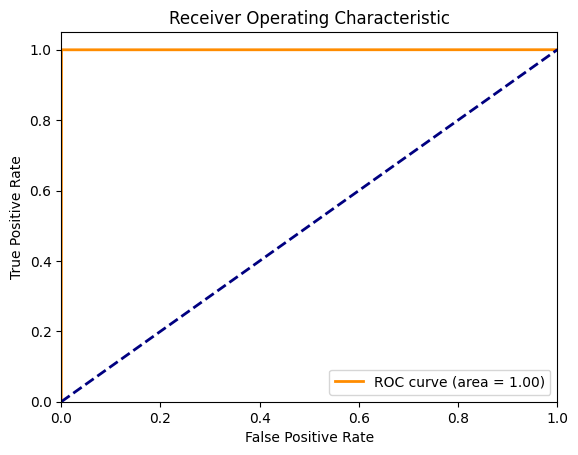

==================Classification report ================== 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27246
           1       1.00      1.00      1.00     27485

    accuracy                           1.00     54731
   macro avg       1.00      1.00      1.00     54731
weighted avg       1.00      1.00      1.00     54731

Accuracy score is: 0.9996893899252709
f1_score is :0.9996907685311506
Precision score is :0.9995998544925427
Recall score is 0.9997816991086047
Model name is: KNeighborsClassifier
=============Confusion matrix=============== 
[[27117   129]
 [    0 27485]]
==============ROC Curve====================== 


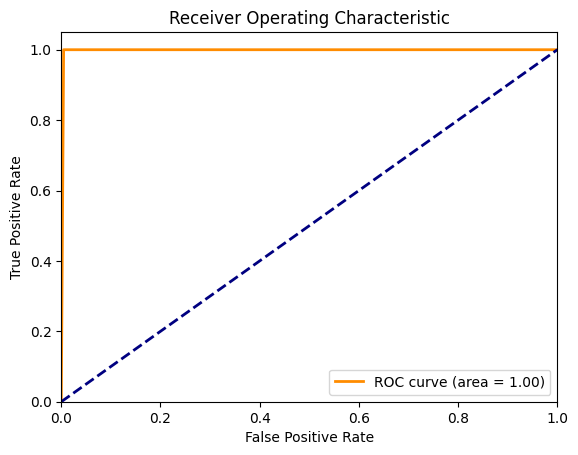

==================Classification report ================== 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27246
           1       1.00      1.00      1.00     27485

    accuracy                           1.00     54731
   macro avg       1.00      1.00      1.00     54731
weighted avg       1.00      1.00      1.00     54731

Accuracy score is: 0.9976430176682319
f1_score is :0.9976587596871086
Precision score is :0.9953284565799957
Recall score is 1.0
Model name is: AdaBoostClassifier
=============Confusion matrix=============== 
[[26337   909]
 [ 1471 26014]]
==============ROC Curve====================== 


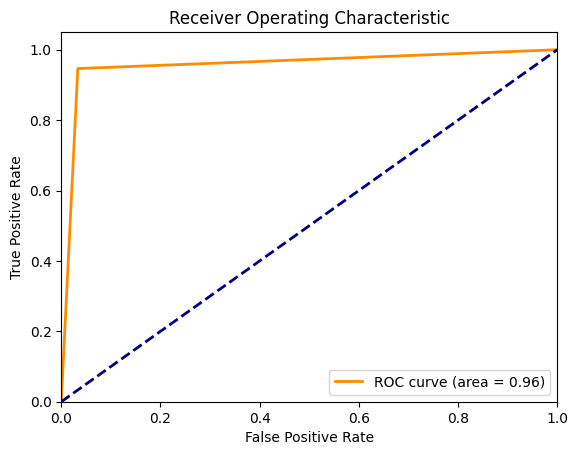

==================Classification report ================== 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27246
           1       0.97      0.95      0.96     27485

    accuracy                           0.96     54731
   macro avg       0.96      0.96      0.96     54731
weighted avg       0.96      0.96      0.96     54731

Accuracy score is: 0.9565145895379218
f1_score is :0.9562564328775179
Precision score is :0.9662370463915612
Recall score is 0.9464798981262507


In [123]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt


accuracy_list = []
f1_score_list = []
Recall_list = []
Precision_list = []
auc_list = []  # Renamed from 'auc' to 'auc_list'
mode = []

for model_name, model_obj in models.items():
    print(f"Model name is: {model_name}")
    # Fit the model with your training data
    model_obj.fit(X_train_sampled, y_train)  # Make sure your training data variable names are correct
    # Predict using your test data
    y_pred = model_obj.predict(X_test_sampled)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Ensure y_test and y_pred are correctly defined
    roc_auc = auc(fpr, tpr)  # Now auc is correctly referred as the function
    
    print("=============Confusion matrix=============== ")
    # Print the confusion matrix
    print(confusion_matrix(y_test, y_pred))
    
    print("==============ROC Curve====================== ")
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("==================Classification report ================== ")
    print(classification_report(y_test, y_pred))
    mode.append(model_name)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    f1_scor = f1_score(y_test, y_pred)
    f1_score_list.append(f1_scor)
    au = roc_auc_score(y_test, y_pred)
    auc_list.append(au)  # Use the renamed 'auc_list' here
    pr = precision_score(y_test, y_pred)
    Precision_list.append(pr)
    re = recall_score(y_test, y_pred)
    Recall_list.append(re)
    
    # Print the accuracy score
    print(f"Accuracy score is: {accuracy}")
    print(f"f1_score is :{f1_scor}")
    print(f"Precision score is :{pr}")
    print(f"Recall score is {re}")
    print("=" * 40)


In [124]:
frame = pd.DataFrame({
     'models':mode,
    'accuracy': accuracy_list,
    'f1_score': f1_score_list,
    'recall': Recall_list,
    'precision': Precision_list,
    'auc': auc_list  
})
frame

models  accuracy  f1_score    recall  precision       auc
0      LogisticRegression  0.904990  0.902424  0.874877   0.931763  0.905122
1                     SVC  0.976905  0.976914  0.973040   0.980819  0.976922
2  DecisionTreeClassifier  0.998794  0.998800  0.999309   0.998292  0.998792
3              GaussianNB  0.900294  0.898128  0.875205   0.922284  0.900404
4  RandomForestClassifier  0.999689  0.999691  0.999782   0.999600  0.999689
5    KNeighborsClassifier  0.997643  0.997659  1.000000   0.995328  0.997633
6      AdaBoostClassifier  0.956515  0.956256  0.946480   0.966237  0.956559

Checking the Overfitting by K-Fold Cross Validation  

In [126]:
from sklearn.model_selection import cross_val_score             
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [128]:
cv_scores = cross_val_score(RandomForestClassifier(), X_train_sampled, y_train, cv=10,verbose=True)

In [129]:
cv_scores

array([0.99958774, 0.99943314, 0.999227  , 0.99953618, 0.99943311,
       0.99963925, 0.99953618, 0.99974232, 0.99963925, 0.99938157])

Observation :There is no overfitting 

We can check the overfitting by calcuating the train and test accuracy

In [140]:
random=RandomForestClassifier()

In [141]:
random.fit(X_train_sampled,y_train)

RandomForestClassifier()

In [142]:
y_pred_train=random.predict(X_train_sampled)

In [143]:
accuracy_score(y_train,y_pred_train)

1.0

In [144]:
y_pred_test=random.predict(X_test_sampled)

In [145]:
accuracy_score(y_test,y_pred_test)

0.999652847563538